<a href="https://colab.research.google.com/github/jihansand/Final-Project-Data-Mining-BI-Data-Kesehatan/blob/main/FinalProject_Data_Mining_BI_Data_Kesehatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT UAS DATA MINING**

**Data**: https://drive.google.com/file/d/1BbPJGIWhQg-pfVlb6hHze95fLe6U61kF/view?usp=sharing

**Task:** <br>
 A. Lakukan Proses Mining pada Data yang diberikan. <br>
 B. Dari hasil A ada informasi/insight apa saja dari data yang bisa didapatkan. <br>
 C. Buat sebuah laporan/presentasi dari hasil B. <br>
<br>
**Anggota Kelompok:**
1. Chatlea Shakira Haq (2106725116)
2. Fernaldy (2106706464)
3. Jihan Sandrina Halim (2106708160)
4. Niken Salsabila Helmelia (2106724933)
5. Zahrah Mahfuzah (2106704004)

## **IMPORT MODULE**

In [ ]:
# Import Modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import math
from mpl_toolkits.mplot3d import Axes3D

## **IMPORT DATASET**

In [ ]:
!gdown 1j5B6v2aX03QH2yb9pFWFZ7RyhJDKarBh

Downloading...
From: https://drive.google.com/uc?id=1j5B6v2aX03QH2yb9pFWFZ7RyhJDKarBh
To: /content/data_kesehatan-Mental-SRQ-2023--Filtered.xlsx
100% 110M/110M [00:03<00:00, 29.5MB/s]


In [ ]:
data = pd.read_excel('/content/data_kesehatan-Mental-SRQ-2023--Filtered.xlsx')

In [ ]:
df = data
df

ID WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
0            1  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
1            2  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
2            3  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
3            4  KALBAR   LAKI - LAKI  40.0           23.0                  S2   
4            5  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   
...        ...     ...           ...   ...            ...                 ...   
289796  289797  KALSEL   LAKI - LAKI  23.0            4.0                 SMA   
289797  289798  JATENG     PEREMPUAN  54.0           27.0                 SMA   
289798  289799  SUMSEL   LAKI - LAKI  51.0           51.0                 SMA   
289799  289800   JABAR   LAKI - LAKI  35.0           17.0                 SMA   
289800  289801   JABAR   LAKI - LAKI  19.0            1.0                 SMA   

       TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG Status Perkawinan  ...  \
0             168.9         85.0             100.0           Menikah  ...   
1             169.5         70.0              80.0           Menikah  ...   
2             169.5         60.0              78.0     Belum Menikah  ...   
3             166.8         80.0              34.0           Menikah  ...   
4             164.5         62.0              32.0           Menikah  ...   
...             ...          ...               ...               ...  ...   
289796          169         60.0              78.0           Menikah  ...   
289797          155         60.0              62.0           Menikah  ...   
289798          575         57.0              28.0           Menikah  ...   
289799          179         55.0              68.0           Menikah  ...   
289800          171        100.0              33.0     Belum Menikah  ...   

       Sumber air bersih di tempat tinggal saudara ?  \
0                                            Air PAM   
1                                            Air PAM   
2                                            Air PAM   
3                                            Air PAM   
4                                            Air PAM   
...                                              ...   
289796                                       Air PAM   
289797                                    Sumur/Kali   
289798                                    Sumur/Kali   
289799                                    Sumur/Kali   
289800                                    Sumur/Kali   

       Penggunaan air bersih untuk makan & minum bersumber dari :   \
0                                             Tadah hujan            
1                                   Air mineral isi ulang            
2                                   Air mineral isi ulang            
3                                   Air mineral isi ulang            
4                                   Air mineral isi ulang            
...                                                   ...            
289796                                            Air PAM            
289797                                Air mineral kemasan            
289798                                          Air sumur            
289799                                          Air sumur            
289800                                          Air sumur            

       Berapa jarak jamban dengan sumur dirumah saudara ?  \
0                                     Lebih dari 12 meter   
1                                     Lebih dari 12 meter   
2                             Tidak memiliki jamban sehat   
3                             Tidak memiliki jamban sehat   
4                                     Lebih dari 12 meter   
...                                                   ...   
289796                        Tidak memiliki jamban sehat   
289797                               Kurang dari 12 meter   
289798                                Lebih dari 12

## **PREPROCESSING**

### **Tipe Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype  
---  ------                                                                                                             --------------   -----  
 0   ID                                                                                                                 289801 non-null  int64  
 1   WILAYAH                                                                                                            289801 non-null  object 
 2   JENIS KELAMIN                                                                                                      289801 non-null  object 
 3   USIA                                                                                                               289801 non-null  float64
 4   LAMA BERDINAS 

Dapat dilihat bahwa **terdapat ketidaksesuaian tipe variabel tinggi badan**, seharusnya adalah *float*.

In [ ]:
df["TINGGI BADAN"] = df["TINGGI BADAN"].replace(",",".", regex = True)
df["TINGGI BADAN"] = df["TINGGI BADAN"].astype(float)

In [ ]:
tipedata = pd.DataFrame(df.dtypes, columns=["Tipe Data"]).reset_index()
tipedata.columns = ["Kolom", "Tipe Data"]
tipedata

Kolom Tipe Data
0                                                  ID     int64
1                                             WILAYAH    object
2                                       JENIS KELAMIN    object
3                                                USIA   float64
4                                       LAMA BERDINAS   float64
..                                                ...       ...
74  Berapa jarak tempat sampah dengan rumah saudara ?    object
75  Apakah di sekitar tempat tinggal Saudara terse...    object
76                                      Kelompok Umur    object
77                                          NILAI IMT   float64
78                                                IMT    object

[79 rows x 2 columns]

Dapat dilihat bahwa **seluruh variabel sudah memiliki tipe data yang sesuai**.

In [ ]:
tipedata = pd.DataFrame(df.dtypes, columns=["Tipe Data"]).reset_index()
tipedata.columns = ["Kolom", "Tipe Data"]
tipedata

Kolom Tipe Data
0                                                  ID     int64
1                                             WILAYAH    object
2                                       JENIS KELAMIN    object
3                                                USIA   float64
4                                       LAMA BERDINAS   float64
..                                                ...       ...
74  Berapa jarak tempat sampah dengan rumah saudara ?    object
75  Apakah di sekitar tempat tinggal Saudara terse...    object
76                                      Kelompok Umur    object
77                                          NILAI IMT   float64
78                                                IMT    object

[79 rows x 2 columns]

In [ ]:
df.sort_values(by="TINGGI BADAN", ascending=True)

ID    WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS  \
214        215     KALTIM   LAKI - LAKI  41.0           22.0   
69          70      JATIM   LAKI - LAKI  51.0           28.0   
101        102      SUMUT   LAKI - LAKI  46.0           26.0   
264        265  METROJAYA   LAKI - LAKI  43.0           21.0   
112        113      JABAR   LAKI - LAKI  56.0           34.0   
...        ...        ...           ...   ...            ...   
289673  289674      JABAR   LAKI - LAKI  30.0            9.0   
289660  289661       ACEH   LAKI - LAKI  47.0           27.0   
289739  289740     JATENG   LAKI - LAKI  46.0           23.0   
289798  289799     SUMSEL   LAKI - LAKI  51.0           51.0   
59532    59533      JATIM   LAKI - LAKI  43.0           21.0   

       PENDIDIKAN TERAKHIR  TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG  \
214                     S1          1.64         75.0              80.0   
69                     SMA          1.65         65.0              63.0   
101                     S1          1.66         86.0              92.0   
264                    SMA          1.68         75.0              36.0   
112                    SMA          1.68         90.0              42.0   
...                    ...           ...          ...               ...   
289673                 SMA        277.00         81.0              79.0   
289660                  S2        279.00         85.0              80.0   
289739                  S1        365.00         70.0             100.0   
289798                 SMA        575.00         57.0              28.0   
59532                  SMA       1799.00       9049.0              49.0   

       Status Perkawinan  ... Sumber air bersih di tempat tinggal saudara ?  \
214              Menikah  ...                                       Air PAM   
69               Menikah  ...                                       Air PAM   
101              Menikah  ...                                       Air PAM   
264              Menikah  ...                                    Sumur/Kali   
112              Menikah  ...                                    Sumur/Kali   
...                  ...  ...                                           ...   
289673           Menikah  ...                                    Sumur/Kali   
289660           Menikah  ...                                       Air PAM   
289739           Menikah  ...                                       Air PAM   
289798           Menikah  ...                                    Sumur/Kali   
59532      Belum Menikah  ...                                       Air PAM   

       Penggunaan air bersih untuk makan & minum bersumber dari :   \
214                                 Air mineral isi ulang            
69                                  Air mineral isi ulang            
101                                   Air mineral kemasan            
264                                   Air mineral kemasan            
112                                             Air sumur            
...                                                   ...            
289673                                          Air sumur            
289660                                            Air PAM            
289739                                            Air PAM            
289798                                          Air sumur            
59532                                 Air mineral kemasan            

       Berapa jarak jamban dengan sumur dirumah saudara ?  \
214                                  Kurang dari 12 meter   
69                                    Lebih dari 12 meter   
101                                  Kurang dari 12 meter   
264                                   Lebih dari 12 meter   
112                                   Lebih dari 12 meter   
...                                                   ...   
289673                               Kurang dari 12 meter   
289660                               Kurang dari 12 meter   
289

### **Noise dan Outlier**

In [ ]:
#Mencari Nilai Max
nilaimax = pd.DataFrame(df.max(), columns=["Nilai Max"]).reset_index()
nilaimax.columns = ["Kolom", "Nilai Max"]
nilaimax

<ipython-input-10-ea2963f01f43>:2: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  nilaimax = pd.DataFrame(df.max(), columns=["Nilai Max"]).reset_index()


Kolom     Nilai Max
0                                                  ID        289801
1                                             WILAYAH         SUMUT
2                                       JENIS KELAMIN     PEREMPUAN
3                                                USIA    23091982.0
4                                       LAMA BERDINAS    31012014.0
..                                                ...           ...
69  Bagaimana saluran pembuangan air (sanitasi) ru...    Tidak tahu
70   Apakah terdapat tempat sampah di sekitar rumah?      Tidak ada
71  Apakah di sekitar tempat tinggal Saudara terse...    Tidak tahu
72                                      Kelompok Umur          ≥ 65
73                                          NILAI IMT  318877.55102

[74 rows x 2 columns]

In [ ]:
#Mencari Nilai Min
nilaimin = pd.DataFrame(df.min(), columns=["Nilai Min"]).reset_index()
nilaimin.columns = ["Kolom", "Nilai Min"]
nilaimin

<ipython-input-11-c7e85ea0cb9e>:2: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  nilaimin = pd.DataFrame(df.min(), columns=["Nilai Min"]).reset_index()


Kolom     Nilai Min
0                                                  ID             1
1                                             WILAYAH          ACEH
2                                       JENIS KELAMIN   LAKI - LAKI
3                                                USIA          15.0
4                                       LAMA BERDINAS           0.0
..                                                ...           ...
69  Bagaimana saluran pembuangan air (sanitasi) ru...           Ada
70   Apakah terdapat tempat sampah di sekitar rumah?   Ada, terbuka
71  Apakah di sekitar tempat tinggal Saudara terse...           Ada
72                                      Kelompok Umur       15 - 24
73                                          NILAI IMT      0.367309

[74 rows x 2 columns]

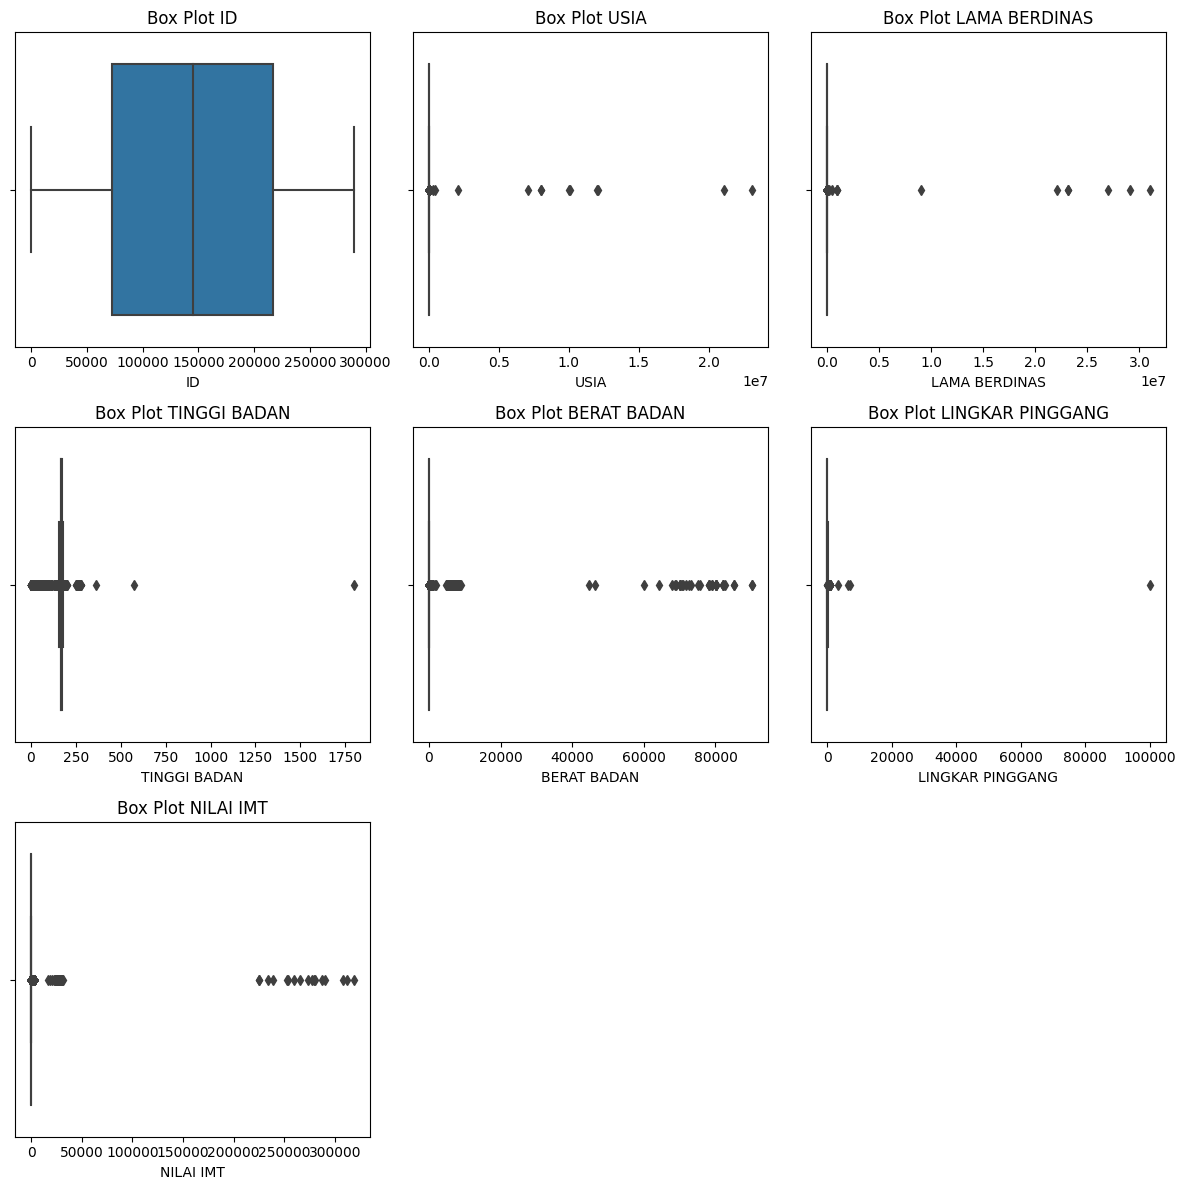

In [ ]:
# Mengambil kolom numerik
numeric_columns = df.select_dtypes(include='number').columns

# Menentukan jumlah kolom dalam satu baris
columns_per_row = 3

# Menghitung jumlah baris subplot yang diperlukan
num_rows = len(numeric_columns) // columns_per_row + (len(numeric_columns) % columns_per_row > 0)

# Membuat subplot dalam satu baris
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(12, 4 * num_rows))

# Loop melalui kolom numerik dan membuat box plot dalam subplot
for i, numeric_column in enumerate(numeric_columns):
    row = i // columns_per_row
    col = i % columns_per_row
    ax = axes[row, col]

    sns.boxplot(x=df[numeric_column], ax=ax)
    ax.set_title(f'Box Plot {numeric_column}')

# Menyembunyikan subplot yang tidak terpakai
for i in range(len(numeric_columns), num_rows * columns_per_row):
    row = i // columns_per_row
    col = i % columns_per_row
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

Dapat dilihat bahwa sangat banyak outlier untuk setiap variabel numberik dalam data. Namun, berdasarkan tujuan analisis, maka **kami hanya mempertimbangkan untuk menangani outlier pada variabel USIA, TINGGI BADAN, dan BERAT BADAN.** Sedangkan, NILAI IMT nanti akan menyesuaikan dengan nilai tinggi dan berat badan.

#### **TINGGI BADAN**

In [ ]:
sorted(df["TINGGI BADAN"].unique().tolist())

[1.64,
 1.65,
 1.66,
 1.68,
 1.69,
 1.7,
 1.71,
 1.72,
 1.75,
 1.76,
 1.77,
 5.0,
 15.0,
 15.5,
 16.0,
 16.39,
 16.6,
 16.7,
 17.0,
 17.1,
 17.5,
 17.6,
 18.0,
 19.0,
 20.0,
 23.0,
 26.0,
 29.0,
 30.0,
 32.0,
 33.0,
 35.0,
 38.0,
 39.0,
 45.0,
 46.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 72.5,
 73.0,
 74.0,
 75.0,
 76.0,
 78.0,
 79.0,
 80.0,
 82.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 95.0,
 97.0,
 100.0,
 101.0,
 108.0,
 110.0,
 120.0,
 130.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 156.5,
 157.0,
 157.5,
 158.0,
 158.5,
 159.0,
 159.5,
 160.0,
 160.5,
 161.0,
 161.5,
 162.0,
 162.5,
 163.0,
 163.5,
 164.0,
 164.4,
 164.5,
 164.7,
 165.0,
 165.4,
 165.5,
 165.58,
 165.7,
 165.9,
 166.0,
 166.3,
 166.5,
 166.6,
 166.8,
 166.9,
 167.0,
 167.2,
 

Diketahui bahwa **range nilai tinggi badan dalam data adalah 1,64 - 1799**. Kami mengasumsikan bahwa satuan tinggi badan dalam data adalah dalam **cm**, sehingga beberapa pertimbangan yang kami lakukan untuk menangani noise dan outlier dalam tinggi badan sebagai berikut.

In [ ]:
df["TINGGI BADAN"] = df["TINGGI BADAN"].replace(".","", regex = True)
df.loc[df["TINGGI BADAN"] <= 2, "TINGGI BADAN"] = df["TINGGI BADAN"]*100
df.loc[df["TINGGI BADAN"] == 5, "TINGGI BADAN"] = df["TINGGI BADAN"]*30
df.loc[(df["TINGGI BADAN"] > 10) & (df["TINGGI BADAN"] < 20), "TINGGI BADAN"] = df["TINGGI BADAN"]*10
df.loc[(df["TINGGI BADAN"] >= 20) & (df["TINGGI BADAN"] < 30), "TINGGI BADAN"] = df["TINGGI BADAN"]*6
df.loc[(df["TINGGI BADAN"] >= 30) & (df["TINGGI BADAN"] < 40), "TINGGI BADAN"] = df["TINGGI BADAN"]*5
df.loc[(df["TINGGI BADAN"] >= 40) & (df["TINGGI BADAN"] < 50), "TINGGI BADAN"] = df["TINGGI BADAN"]*4
df.loc[(df["TINGGI BADAN"] >= 50) & (df["TINGGI BADAN"] < 100), "TINGGI BADAN"] = df["TINGGI BADAN"]+100
df.loc[(df["TINGGI BADAN"] >= 100) & (df["TINGGI BADAN"] < 140), "TINGGI BADAN"] = df["TINGGI BADAN"]+50
df.loc[(df["TINGGI BADAN"] >= 200) & (df["TINGGI BADAN"] < 250), "TINGGI BADAN"] = df["TINGGI BADAN"]-50
df.loc[(df["TINGGI BADAN"] >= 250) & (df["TINGGI BADAN"] < 300), "TINGGI BADAN"] = df["TINGGI BADAN"]-100
df.loc[(df["TINGGI BADAN"] >= 300) & (df["TINGGI BADAN"] < 400), "TINGGI BADAN"] = df["TINGGI BADAN"]/2
df.loc[(df["TINGGI BADAN"] >= 400) & (df["TINGGI BADAN"] < 1000), "TINGGI BADAN"] = df["TINGGI BADAN"]/3
df.loc[df["TINGGI BADAN"] > 1000, "TINGGI BADAN"] = df["TINGGI BADAN"]/10

In [ ]:
sorted(df["TINGGI BADAN"].unique().tolist())

[140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 156.5,
 157.0,
 157.5,
 158.0,
 158.5,
 159.0,
 159.5,
 160.0,
 160.5,
 161.0,
 161.5,
 162.0,
 162.5,
 163.0,
 163.5,
 163.9,
 164.0,
 164.4,
 164.5,
 164.7,
 165.0,
 165.4,
 165.5,
 165.58,
 165.7,
 165.9,
 166.0,
 166.3,
 166.5,
 166.6,
 166.8,
 166.9,
 167.0,
 167.2,
 167.5,
 167.6,
 167.8,
 168.0,
 168.2,
 168.5,
 168.58,
 168.8,
 168.9,
 169.0,
 169.2,
 169.5,
 169.7,
 170.0,
 170.2,
 170.3,
 170.5,
 171.0,
 171.3,
 171.5,
 171.6,
 171.8,
 172.0,
 172.5,
 172.6,
 172.8,
 173.0,
 173.4,
 173.5,
 173.8,
 174.0,
 174.5,
 174.8,
 175.0,
 175.5,
 175.8,
 176.0,
 176.5,
 176.6,
 177.0,
 177.5,
 178.0,
 178.5,
 179.0,
 179.5,
 179.9,
 180.0,
 180.5,
 181.0,
 182.0,
 182.5,
 183.0,
 184.0,
 185.0,
 185.5,
 186.0,
 187.0,
 188.0,
 188.5,
 189.0,
 190.0,
 191.0,
 191.66666666666666,
 192.0,
 193.0,
 194.0,
 195.0,
 196.0,
 197.0,
 198.0,
 199.0]

Kemudian, setelah dilakukan penyesuaian, diperoleh **range nilai tinggi badan yang baru adalah 140 - 199 cm**.

#### **BERAT BADAN**

In [ ]:
sorted(df["BERAT BADAN"].unique().tolist())

[1.0,
 6.77,
 15.0,
 22.0,
 27.0,
 29.0,
 30.0,
 31.0,
 32.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 45.5,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 51.5,
 52.0,
 52.5,
 53.0,
 53.8,
 54.0,
 54.5,
 55.0,
 56.0,
 56.5,
 57.0,
 57.5,
 58.0,
 58.5,
 59.0,
 59.5,
 60.0,
 60.8,
 61.0,
 62.0,
 62.1,
 62.5,
 63.0,
 63.5,
 64.0,
 64.4,
 65.0,
 66.0,
 66.5,
 67.0,
 68.0,
 68.5,
 68.9,
 69.0,
 69.5,
 69.55,
 70.0,
 70.5,
 70.65,
 71.0,
 71.2,
 71.6,
 71.8,
 72.0,
 73.0,
 73.5,
 74.0,
 75.0,
 75.5,
 76.0,
 77.0,
 77.3,
 78.0,
 78.5,
 79.0,
 80.0,
 80.1,
 81.0,
 82.0,
 83.0,
 83.5,
 84.0,
 84.6,
 85.0,
 85.2,
 86.0,
 87.0,
 87.6,
 88.0,
 89.0,
 90.0,
 90.7,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 95.8,
 96.0,
 97.0,
 98.0,
 98.5,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0

Diketahui bahwa **range nilai berat badan dalam data adalah 1 - 90210**. Kami mengasumsikan bahwa satuan berat badan dalam data adalah dalam **kg**, sehingga beberapa pertimbangan yang kami lakukan untuk menangani noise dan outlier dalam berat badan sebagai berikut.

In [ ]:
df["BERAT BADAN"] = df["BERAT BADAN"].replace(".","", regex = True)
df.loc[df["BERAT BADAN"] == 1, "BERAT BADAN"] = df["BERAT BADAN"]*50
df.loc[df["BERAT BADAN"] == 6.77, "BERAT BADAN"] = df["BERAT BADAN"]*10
df.loc[(df["BERAT BADAN"] > 10) & (df["BERAT BADAN"] < 30), "BERAT BADAN"] = df["BERAT BADAN"]+50
df.loc[(df["BERAT BADAN"] > 150) & (df["BERAT BADAN"] <= 250), "BERAT BADAN"] = df["BERAT BADAN"]-100
df.loc[(df["BERAT BADAN"] > 250) & (df["BERAT BADAN"] <= 2500), "BERAT BADAN"] = df["BERAT BADAN"]/10
df.loc[(df["BERAT BADAN"] > 4000) & (df["BERAT BADAN"] <= 10000), "BERAT BADAN"] = df["BERAT BADAN"]/100
df.loc[(df["BERAT BADAN"] > 10000) & (df["BERAT BADAN"] <= 100000), "BERAT BADAN"] = df["BERAT BADAN"]/1000

In [ ]:
sorted(df["BERAT BADAN"].unique().tolist())

[30.0,
 31.0,
 32.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 40.2,
 41.0,
 42.0,
 43.0,
 44.0,
 44.626,
 45.0,
 45.5,
 46.0,
 46.228,
 47.0,
 48.0,
 48.3,
 49.0,
 50.0,
 50.3,
 50.6,
 50.67,
 50.7,
 51.0,
 51.5,
 51.75,
 52.0,
 52.32,
 52.5,
 52.62,
 52.65,
 52.7,
 53.0,
 53.1,
 53.31,
 53.6,
 53.7,
 53.8,
 53.88,
 54.0,
 54.3,
 54.5,
 55.0,
 55.2,
 55.28,
 55.3,
 55.32,
 55.34,
 55.39,
 55.4,
 55.44,
 55.5,
 55.6,
 55.68,
 55.7,
 55.75,
 55.8,
 55.94,
 56.0,
 56.2,
 56.3,
 56.35,
 56.5,
 56.58,
 56.6,
 56.74,
 56.75,
 56.82,
 56.85,
 56.9,
 56.95,
 57.0,
 57.32,
 57.5,
 57.75,
 58.0,
 58.2,
 58.3,
 58.32,
 58.4,
 58.5,
 58.6,
 58.62,
 58.64,
 58.65,
 58.68,
 58.7,
 58.9,
 59.0,
 59.5,
 59.75,
 60.0,
 60.1,
 60.2,
 60.29,
 60.3,
 60.31,
 60.32,
 60.35,
 60.4,
 60.5,
 60.56,
 60.6,
 60.63,
 60.65,
 60.67,
 60.7,
 60.75,
 60.76,
 60.78,
 60.8,
 60.81,
 60.9,
 60.92,
 60.97,
 61.0,
 61.6,
 61.65,
 61.72,
 61.75,
 62.0,
 62.1,
 62.29,
 62.32,
 62.35,
 62.5,
 62.6,
 62.62,
 62.7,


Kemudian, setelah dilakukan penyesuaian, diperoleh **range nilai berat badan yang baru adalah 30 - 202.2 kg**.

#### **USIA**

In [ ]:
sorted(df["USIA"].unique().tolist())

[15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 30.03,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 99.0,
 100.0,
 191.0,
 279.0,
 298.0,
 370.0,
 371.0,
 381.0,
 382.0,
 401.0,
 422.0,
 442.0,
 522.0,
 533.0,
 553.0,
 2022.0,
 2619.0,
 2910.0,
 4020.0,
 4120.0,
 4220.0,
 4222.0,
 4323.0,
 4325.0,
 4621.0,
 4626.0,
 4822.0,
 4826.0,
 4927.0,
 5129.0,
 5333.0,
 5429.0,
 5431.0,
 5633.0,
 5736.0,
 280701.0,
 462525.0,
 2071967.0,
 7091992.0,
 8011996.0,
 8021981.0,
 10032023.0,
 10051996.0,
 12041979.0,
 12051987.

Diketahui bahwa **range nilai usia dalam data adalah 15 - 23091982**. Kami mengasumsikan bahwa satuan usia dalam data adalah dalam tahun, sehingga beberapa pertimbangan yang kami lakukan untuk menangani noise dan outlier dalam usia sebagai berikut.

In [ ]:
df["USIA"] = df["USIA"].replace(".","", regex = True)
df["USIA"] = df["USIA"].replace(".","", regex = True)
df.loc[(df["USIA"] > 150) & (df["USIA"] <= 560), "USIA"] = df.loc[(df["USIA"] > 150) & (df["USIA"] <= 560), "USIA"].apply(lambda x: math.floor((x - x % 10) / 10))
df.loc[(df["USIA"] > 2000) & (df["USIA"] <= 6000), "USIA"] = df.loc[(df["USIA"] > 2000) & (df["USIA"] <= 6000), "USIA"].apply(lambda x: math.floor(x / 100))
df['USIA'] = df['USIA'].replace({280701:28,
                                 462525:46,
                                 10032003:20,
                                 10051996:27,
                                 12041979:44,
                                 12051987:36,
                                 21071984:39,
                                 23091982:41,
                                 8011996:27,
                                 2071967:56,
                                 10032023:32,
                                 7091992:31,
                                 8021981:42})

In [ ]:
sorted(df["USIA"].unique().tolist())

[15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 30.03,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 99.0,
 100.0]

Kemudian, setelah dilakukan penyesuaian, diperoleh **range usia yang baru adalah 15 - 100 tahun**.

### **Memastikan Kembali Kolom Kelompok Umur, NILAI IMT, dan KATEGORI IMT**

Berdasarkan data yang diberikan, diketahui bahwa **variabel Kelompok Umur, NILAI IMT, dan IMT diperoleh dengan menyesuaikan pada variabel USIA, TINGGI BADAN, dan BERAT BADAN**. Sebelumnya, kami telah menangani noise dan outlier dari variabel-variabel tersebut, oleh karena itu **akan dilakukan penyesuaian ulang untuk variabel Kelompok Umur, NILAI IMT, dan IMT** sebagai berikut.

In [ ]:
df['Kelompok Umur'] = df['USIA'].apply(lambda usia: '15 - 24' if usia <= 24 else
                                                  '25 - 34' if usia <= 34 else
                                                  '35 - 44' if usia <= 44 else
                                                  '45 - 54' if usia <= 54 else
                                                  '55 - 64' if usia <= 64 else
                                                  '≥ 65')

In [ ]:
df['NILAI IMT'] = df['BERAT BADAN'] / ((df['TINGGI BADAN'] / 100)**2)
sorted(df["NILAI IMT"].unique().tolist())

[9.908838684106222,
 10.357846904340272,
 11.019283746556475,
 11.072664359861593,
 11.115493563770663,
 11.204089492664824,
 11.291354586171856,
 11.299070247933885,
 11.337868480725625,
 11.428571428571429,
 11.694343279093856,
 11.755102040816327,
 11.904345085956376,
 11.944731404958677,
 12.081632653061224,
 12.191186489296856,
 12.254472882602151,
 12.400793650793652,
 12.408163265306122,
 12.449071978270712,
 12.488521579430671,
 12.549750797805586,
 12.604600679247927,
 12.701408041805777,
 12.85583103764922,
 12.995451591942821,
 13.013087447947653,
 13.148283418553687,
 13.266879414823048,
 13.271604938271604,
 13.304856272539478,
 13.427202787051822,
 13.46371882086168,
 13.494809688581316,
 13.536026655560184,
 13.590449954086319,
 13.735844449192637,
 13.84083044982699,
 13.881714876033058,
 13.887135462694104,
 14.00511186583103,
 14.128494943486023,
 14.151925078043703,
 14.202668780552253,
 14.325068870523417,
 14.342572340349243,
 14.429642608673246,
 14.45253786564920

In [ ]:
df['IMT'] = df['NILAI IMT'].apply(lambda value: 'Sangat Kurus' if value < 17 else
                                                      'Kurus' if value < 18.5 else
                                                      'Normal' if value < 25 else
                                                      'Gemuk' if value <= 27 else
                                                      'Obesitas')

In [ ]:
df

ID WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
0            1  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
1            2  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
2            3  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
3            4  KALBAR   LAKI - LAKI  40.0           23.0                  S2   
4            5  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   
...        ...     ...           ...   ...            ...                 ...   
289796  289797  KALSEL   LAKI - LAKI  23.0            4.0                 SMA   
289797  289798  JATENG     PEREMPUAN  54.0           27.0                 SMA   
289798  289799  SUMSEL   LAKI - LAKI  51.0           51.0                 SMA   
289799  289800   JABAR   LAKI - LAKI  35.0           17.0                 SMA   
289800  289801   JABAR   LAKI - LAKI  19.0            1.0                 SMA   

        TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG Status Perkawinan  ...  \
0         168.900000         85.0             100.0           Menikah  ...   
1         169.500000         70.0              80.0           Menikah  ...   
2         169.500000         60.0              78.0     Belum Menikah  ...   
3         166.800000         80.0              34.0           Menikah  ...   
4         164.500000         62.0              32.0           Menikah  ...   
...              ...          ...               ...               ...  ...   
289796    169.000000         60.0              78.0           Menikah  ...   
289797    155.000000         60.0              62.0           Menikah  ...   
289798    191.666667         57.0              28.0           Menikah  ...   
289799    179.000000         55.0              68.0           Menikah  ...   
289800    171.000000        100.0              33.0     Belum Menikah  ...   

       Sumber air bersih di tempat tinggal saudara ?  \
0                                            Air PAM   
1                                            Air PAM   
2                                            Air PAM   
3                                            Air PAM   
4                                            Air PAM   
...                                              ...   
289796                                       Air PAM   
289797                                    Sumur/Kali   
289798                                    Sumur/Kali   
289799                                    Sumur/Kali   
289800                                    Sumur/Kali   

       Penggunaan air bersih untuk makan & minum bersumber dari :   \
0                                             Tadah hujan            
1                                   Air mineral isi ulang            
2                                   Air mineral isi ulang            
3                                   Air mineral isi ulang            
4                                   Air mineral isi ulang            
...                                                   ...            
289796                                            Air PAM            
289797                                Air mineral kemasan            
289798                                          Air sumur            
289799                                          Air sumur            
289800                                          Air sumur            

       Berapa jarak jamban dengan sumur dirumah saudara ?  \
0                                     Lebih dari 12 meter   
1                                     Lebih dari 12 meter   
2                             Tidak memiliki jamban sehat   
3                             Tidak memiliki jamban sehat   
4                                     Lebih dari 12 meter   
...                                                   ...   
289796                        Tidak memiliki jamban sehat   
289797                               Kurang dari 12 meter   
289798                                L

### **Memeriksa Kembali Outlier Dengan Boxplot**

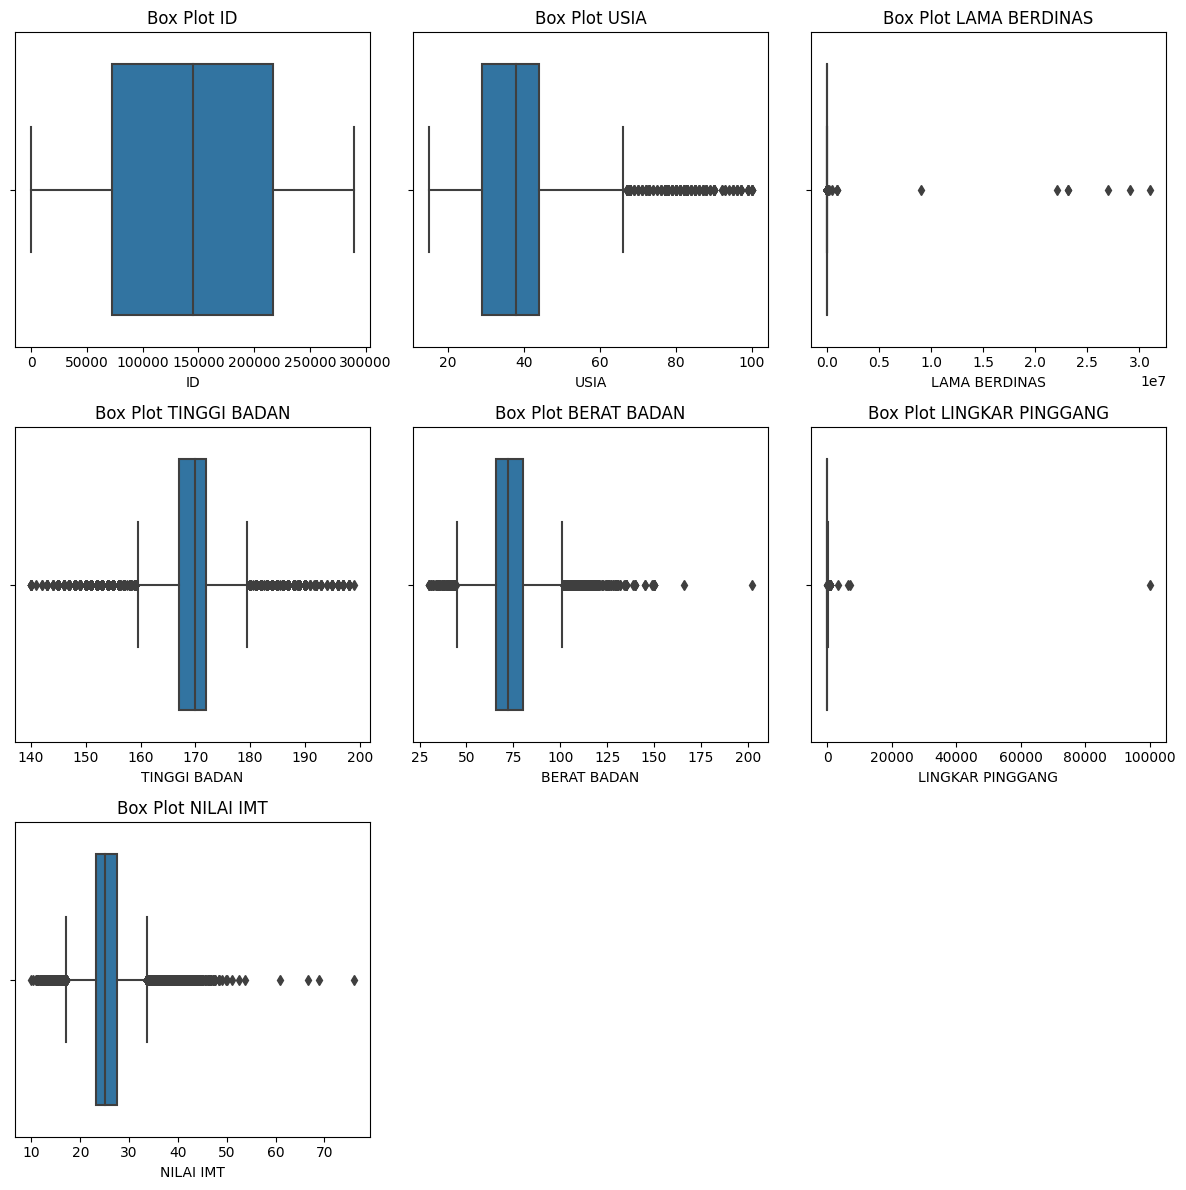

In [ ]:
# Mengambil kolom numerik
numeric_columns = df.select_dtypes(include='number').columns

# Menentukan jumlah kolom dalam satu baris
columns_per_row = 3

# Menghitung jumlah baris subplot yang diperlukan
num_rows = len(numeric_columns) // columns_per_row + (len(numeric_columns) % columns_per_row > 0)

# Membuat subplot dalam satu baris
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(12, 4 * num_rows))

# Loop melalui kolom numerik dan membuat box plot dalam subplot
for i, numeric_column in enumerate(numeric_columns):
    row = i // columns_per_row
    col = i % columns_per_row
    ax = axes[row, col]

    sns.boxplot(x=df[numeric_column], ax=ax)
    ax.set_title(f'Box Plot {numeric_column}')

# Menyembunyikan subplot yang tidak terpakai
for i in range(len(numeric_columns), num_rows * columns_per_row):
    row = i // columns_per_row
    col = i % columns_per_row
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

### **Missing Value**

In [ ]:
# Memeriksa Total Missing Value
df.isnull().sum()[df.isnull().sum() > 0]

Jika Ya berapa jumlah gigi saudara yang Karies          223744
Jika Ya, Berapa Batang Saudara merokok dalam sehari?    152543
Berapa lama saudara menggosok gigi ?                      1779
Berapa jarak tempat sampah dengan rumah saudara ?        41649
dtype: int64

In [ ]:
# Memeriksa Persentase Missing Value
(df.isnull().sum()[df.isnull().sum() > 0] / len(df)) * 100

Jika Ya berapa jumlah gigi saudara yang Karies          77.206083
Jika Ya, Berapa Batang Saudara merokok dalam sehari?    52.637154
Berapa lama saudara menggosok gigi ?                     0.613870
Berapa jarak tempat sampah dengan rumah saudara ?       14.371586
dtype: float64

Perhatikan bahwa **missing value pada variabel “Jika Ya berapa jumlah gigi saudara yang Karies” dan “Jika Ya, Berapa Batang Saudara merokok dalam sehari?” artinya individu tersebut tidak memiliki gigi yang karies dan/atau tidak merokok**. Sehingga, akan diimputasi dengan nol.

In [ ]:
# Imputasi NaN pada "Jika Ya berapa jumlah gigi saudara yang Karies" menjadi 0
df['Jika Ya berapa jumlah gigi saudara yang Karies'].fillna(0, inplace=True)

In [ ]:
# Imputasi NaN pada "Jika Ya, Berapa Batang Saudara merokok dalam sehari?" menjadi 0
df['Jika Ya, Berapa Batang Saudara merokok dalam sehari?'].fillna(0, inplace=True)

Untuk menangani missing value pada variabel “Berapa lama saudara menggosok gigi ?” akan diperiksa terlebih dahulu baris-barisnya.

In [ ]:
# Menampilkan baris-baris di mana "Berapa lama saudara menggosok gigi ?" adalah NaN
gosok_gigi_nan = df[df['Berapa lama saudara menggosok gigi ?'].isna()]
gosok_gigi_nan.head(10)

ID    WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
138    139       ACEH   LAKI - LAKI  41.0           19.0                 SMA   
195    196     KALSEL     PEREMPUAN  51.0           27.0                  S3   
1496  1497       BALI   LAKI - LAKI  43.0           23.0                 SMA   
1902  1903      PABAR   LAKI - LAKI  45.0           24.0                 SMA   
1944  1945     MALUKU   LAKI - LAKI  28.0           10.0                 SMA   
1949  1950  METROJAYA   LAKI - LAKI  57.0           35.0                 SMA   
2055  2056     MALUKU   LAKI - LAKI  30.0            9.0                 SMA   
2100  2101    KALTARA     PEREMPUAN  29.0            7.0                 SMA   
2142  2143      JATIM   LAKI - LAKI  57.0           12.0                 SMA   
2145  2146       ACEH   LAKI - LAKI  47.0           26.0                 SMA   

      TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG Status Perkawinan  ...  \
138          170.0         65.0              75.0           Menikah  ...   
195          160.0         68.0              79.0           Menikah  ...   
1496         173.0         80.7              75.0           Menikah  ...   
1902         165.0         63.0              40.0           Menikah  ...   
1944         169.0         68.0              35.0     Belum Menikah  ...   
1949         165.0         60.0              34.0           Menikah  ...   
2055         197.0         68.0              79.0           Menikah  ...   
2100         160.0         65.0              80.0           Menikah  ...   
2142         169.0         80.0              35.0           Menikah  ...   
2145         169.0         80.0              45.0           Menikah  ...   

     Sumber air bersih di tempat tinggal saudara ?  \
138                                        Air PAM   
195                                        Air PAM   
1496                                    Sumur/Kali   
1902                                    Sumur/Kali   
1944                                       Air PAM   
1949                                    Sumur/Kali   
2055                                    Sumur/Kali   
2100                                       Air PAM   
2142                                    Sumur/Kali   
2145                                       Air PAM   

     Penggunaan air bersih untuk makan & minum bersumber dari :   \
138                                             Air PAM            
195                                             Air PAM            
1496                                          Air sumur            
1902                                          Air sumur            
1944                                            Air PAM            
1949                                          Air sumur            
2055                                            Air PAM            
2100                              Air mineral isi ulang            
2142                                Air mineral kemasan            
2145                                            Air PAM            

     Berapa jarak jamban dengan sumur dirumah saudara ?  \
138                                 Lebih dari 12 meter   
195                                Kurang dari 12 meter   
1496                               Kurang dari 12 meter   
1902                        Tidak memiliki jamban sehat   
1944                                Lebih dari 12 meter   
1949                                Lebih dari 12 meter   
2055                               Kurang dari 12 meter   
2100                                Lebih dari 12 meter   
2142                                Lebih dari 12 meter   
2145                                Lebih dari 12 meter   

     Bagaimana saluran pembuangan air (sanitasi) rumah tangga?  \
138                                                 Ada          
195                                                 Ada          
1496                                                Ada          
1902                            

Dapat dilihat bahwa **baris-baris yang berisi NaN dikarenakan memang individu tersebut tidak membersihkan/menggosok gigi**. Oleh karena itu, dalam hal ini, **NaN akan diimputasi dengan nol**.

In [ ]:
# Imputasi NaN pada "Berapa lama saudara menggosok gigi ?" menjadi 0
df['Berapa lama saudara menggosok gigi ?'].fillna(0, inplace=True)

Untuk menangani missing value pada variabel “Berapa jarak tempat sampah dengan rumah saudara ?” juga akan diperiksa terlebih dahulu baris-barisnya.

In [ ]:
# Menampilkan baris-baris di mana "Berapa jarak tempat sampah dengan rumah saudara ?" adalah NaN
jarak_tpsampah_nan = df[df['Berapa jarak tempat sampah dengan rumah saudara ?'].isna()]
jarak_tpsampah_nan.head(10)

ID WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
2    3  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
5    6  KALBAR   LAKI - LAKI  47.0           25.0                 SMP   
6    7  KALBAR   LAKI - LAKI  41.0           20.0                  S1   
12  13  SULSEL   LAKI - LAKI  25.0           29.0                  S1   
18  19  SULSEL   LAKI - LAKI  40.0           19.0                 SMA   
22  23  SULSEL   LAKI - LAKI  42.0           22.0                 SMA   
34  35     NTT   LAKI - LAKI  24.0            3.0                 SMA   
49  50   JATIM   LAKI - LAKI  57.0           31.0                 SMA   
61  62   JATIM   LAKI - LAKI  39.0           17.0                 SMA   
86  87   JAMBI     PEREMPUAN  25.0            2.0                  D3   

    TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG Status Perkawinan  ...  \
2          169.5        60.00              78.0     Belum Menikah  ...   
5          165.5        63.00              32.0           Menikah  ...   
6          168.5        71.00              90.0           Menikah  ...   
12         172.0        70.65              34.0           Menikah  ...   
18         163.5        65.00              82.0           Menikah  ...   
22         172.5        80.00              80.0           Menikah  ...   
34         175.5        62.00              70.0           Menikah  ...   
49         169.5        80.00              80.0           Menikah  ...   
61         166.5        69.00              95.0           Menikah  ...   
86         156.5        67.00              83.0           Menikah  ...   

   Sumber air bersih di tempat tinggal saudara ?  \
2                                        Air PAM   
5                                        Air PAM   
6                                        Air PAM   
12                                    Sumur/Kali   
18                                    Sumur/Kali   
22                                    Sumur/Kali   
34                                    Sumur/Kali   
49                                    Sumur/Kali   
61                                       Air PAM   
86                                    Sumur/Kali   

   Penggunaan air bersih untuk makan & minum bersumber dari :   \
2                               Air mineral isi ulang            
5                                         Tadah hujan            
6                                         Tadah hujan            
12                                Air mineral kemasan            
18                                          Air sumur            
22                              Air mineral isi ulang            
34                              Air mineral isi ulang            
49                                          Air sumur            
61                              Air mineral isi ulang            
86                                          Air sumur            

   Berapa jarak jamban dengan sumur dirumah saudara ?  \
2                         Tidak memiliki jamban sehat   
5                                 Lebih dari 12 meter   
6                                 Lebih dari 12 meter   
12                               Kurang dari 12 meter   
18                                Lebih dari 12 meter   
22                               Kurang dari 12 meter   
34                               Kurang dari 12 meter   
49                               Kurang dari 12 meter   
61                               Kurang dari 12 meter   
86                                Lebih dari 12 meter   

   Bagaimana saluran pembuangan air (sanitasi) rumah tangga?  \
2                                                 Ada          
5                                                 Ada          
6                                                 Ada          
12                                                Ada          
18                                                Ada          
22                                                Ada          
34       

Dapat dilihat bahwa **baris-baris yang berisi NaN dikarenakan memang tidak terdapat tempat sampah di sekitar**. Oleh karena itu, dalam hal ini, **NaN akan diimputasi dengan nol**.

In [ ]:
# Imputasi NaN pada "Berapa jarak tempat sampah dengan rumah saudara ?" menjadi 0
df['Berapa jarak tempat sampah dengan rumah saudara ?'].fillna(0, inplace=True)

In [ ]:
# Memeriksa Kembali Missing Value
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.isna().sum()

ID                                                                                                                   0
WILAYAH                                                                                                              0
JENIS KELAMIN                                                                                                        0
USIA                                                                                                                 0
LAMA BERDINAS                                                                                                        0
PENDIDIKAN TERAKHIR                                                                                                  0
TINGGI BADAN                                                                                                         0
BERAT BADAN                                                                                                          0
LINGKAR PINGGANG                                

Dapat dilihat bahwa **sudah tidak terdapat missing value dalam data**.

### **Duplikasi Data**

In [ ]:
# Memeriksa Duplikasi Data
df.duplicated().sum()

0

Dapat dilihat bahwa **tidak terdapat duplikat dalam data.**

### **Korelasi**

<ipython-input-37-b866251befe5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


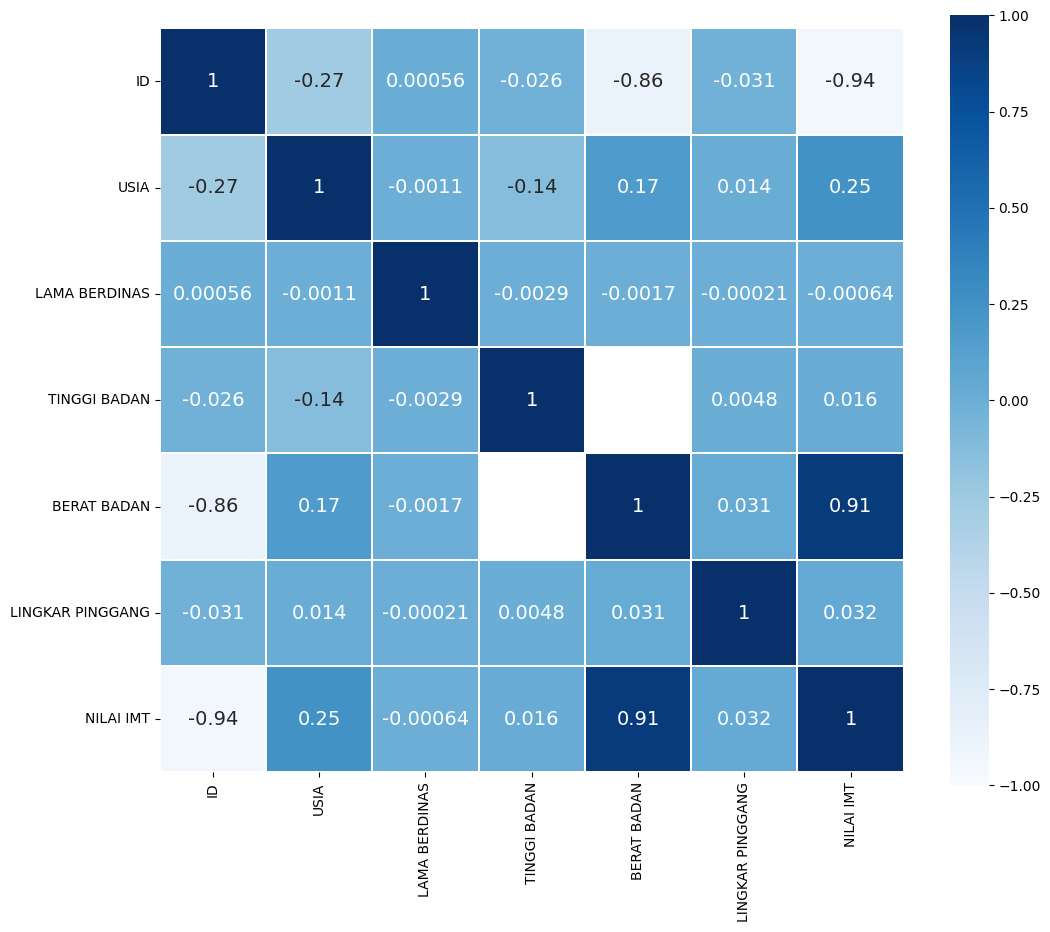

In [ ]:
# Memeriksa Korelasi
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= 0.4)],
            cmap='Blues', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Berdasarkan heatmap di samping, dapat dilihat bahwa **terdapat korelasi positif antara NILAI IMT dengan USIA, TINGGI BADAN, BERAT BADAN, dan LINGKAR PINGGANG**. Artinya, seiring bertambahnya usia, tinggi badan, berat badan, dan lingkar pinggang, maka nilai IMT juga cenderung meningkat.

### **Data Frame Kesehatan Mental**

In [ ]:
mental = df.loc[:, ['ID', 'WILAYAH', 'JENIS KELAMIN','NILAI IMT','IMT', 'USIA','Kelompok Umur', 'PENDIDIKAN TERAKHIR',
                      'Status Perkawinan', 'PENGELUARAN/BULAN',
                      'Sering menderita sakit kepala ?',
                      'Tidak nafsu makan ?',
                      'Sulit tidur ?',
                      'Mudah takut ?',
                      'Merasa tegang, cemas atau kuatir ?',
                      'Tangan anda gemetar ?',
                      'Pencernaan anda terganggu / buruk ?',
                      'Sulit untuk berpikir jernih ?',
                      'Merasa tidak bahagia ?',
                      'Menangis lebih sering ?',
                      'Sulit untuk mengambil keputusan ?',
                      'Pekerjaan anda sehari – hari terganggu ?',
                      'Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?',
                      'Kehilangan minat pada berbagai hal ?',
                      'Tidak merasa berharga?',
                      'Mempunyai pikiran untuk mengakhiri hidup?',
                      'Merasa lelah sepanjang waktu?',
                      'Mengalami rasa tidak enak di perut?',
                      'Mudah lelah ?',
                      'Apakah saudara merokok ?',
                      'Jika Ya, Berapa Batang Saudara merokok dalam sehari?',
                      'Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?',
                      'Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?']]
df_mental = pd.DataFrame(mental)

In [ ]:
df_mental.head(10)

ID WILAYAH JENIS KELAMIN  NILAI IMT       IMT  USIA Kelompok Umur  \
0   1  KALBAR   LAKI - LAKI  29.796114  Obesitas  34.0       25 - 34   
1   2  KALBAR   LAKI - LAKI  24.364563    Normal  43.0       35 - 44   
2   3  KALBAR   LAKI - LAKI  20.883912    Normal  21.0       15 - 24   
3   4  KALBAR   LAKI - LAKI  28.753975  Obesitas  40.0       35 - 44   
4   5  KALBAR   LAKI - LAKI  22.911836    Normal  28.0       25 - 34   
5   6  KALBAR   LAKI - LAKI  23.000885    Normal  47.0       45 - 54   
6   7  KALBAR   LAKI - LAKI  25.006824     Gemuk  41.0       35 - 44   
7   8  KALBAR   LAKI - LAKI  22.710204    Normal  28.0       25 - 34   
8   9  KALBAR   LAKI - LAKI  24.868725    Normal  23.0       15 - 24   
9  10  KALBAR   LAKI - LAKI  29.937660  Obesitas  41.0       35 - 44   

  PENDIDIKAN TERAKHIR Status Perkawinan        PENGELUARAN/BULAN  \
0                 SMA           Menikah  Rp. 7 Juta s.d. 10 Juta   
1                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta   
2                 SMA     Belum Menikah   Rp. 2 Juta s.d. 6 Juta   
3                  S2           Menikah  Rp. 7 Juta s.d. 10 Juta   
4                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta   
5                 SMP           Menikah   Rp. 2 Juta s.d. 6 Juta   
6                  S1           Menikah   Rp. 2 Juta s.d. 6 Juta   
7                  S1           Menikah   Rp. 2 Juta s.d. 6 Juta   
8                 SMA     Belum Menikah   Rp. 2 Juta s.d. 6 Juta   
9                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta   

  Sering menderita sakit kepala ? Tidak nafsu makan ?    Sulit tidur ?  \
0                 Kadang - kadang               Tidak            Tidak   
1                           Tidak               Tidak            Tidak   
2                 Kadang - kadang               Tidak            Tidak   
3                           Tidak               Tidak            Tidak   
4                 Kadang - kadang               Tidak            Tidak   
5                 Kadang - kadang               Tidak  Kadang - kadang   
6                 Kadang - kadang               Tidak            Tidak   
7                           Tidak     Kadang - kadang  Kadang - kadang   
8                           Tidak               Tidak            Tidak   
9                 Kadang - kadang               Tidak            Tidak   

     Mudah takut ? Merasa tegang, cemas atau kuatir ? Tangan anda gemetar ?  \
0            Tidak                              Tidak                 Tidak   
1            Tidak                              Tidak                 Tidak   
2  Kadang - kadang                              Tidak                 Tidak   
3            Tidak                              Tidak                 Tidak   
4            Tidak                              Tidak                 Tidak   
5            Tidak                              Tidak                 Tidak   
6            Tidak                              Tidak                 Tidak   
7            Tidak                              Tidak                 Tidak   
8            Tidak                              Tidak                 Tidak   
9            Tidak                              Tidak                 Tidak   

  Pencernaan anda terganggu / buruk ? Sulit untuk berpikir jernih ?  \
0                               Tidak                         Tidak   
1                               Tidak                         Tidak   
2                               Tidak                         Tidak   
3                               Tidak                         Tidak   
4                               Tidak                         Tidak   
5                               Tidak                         Tidak   
6                               Tidak                         Tidak   
7                     Kadang - kadang                         Tidak   
8                               Tidak                         Tidak   
9                     Kadang - kadang                         Tida

In [ ]:
#df_mental.to_excel("data_mental.xlsx", index=False)

### **Data Frame Obesitas**

In [ ]:
obesitas = df.loc[:, ['ID', 'WILAYAH', 'JENIS KELAMIN','NILAI IMT','IMT', 'Kelompok Umur', 'PENDIDIKAN TERAKHIR',
                         'Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?',
                         'Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari',
                         'Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?',
                         'Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?',
                         'Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?',
                         'Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?'
                         ]]
df_obesitas = pd.DataFrame(obesitas)

In [ ]:
df_obesitas.head()

ID WILAYAH JENIS KELAMIN  NILAI IMT       IMT Kelompok Umur  \
0   1  KALBAR   LAKI - LAKI  29.796114  Obesitas       25 - 34   
1   2  KALBAR   LAKI - LAKI  24.364563    Normal       35 - 44   
2   3  KALBAR   LAKI - LAKI  20.883912    Normal       15 - 24   
3   4  KALBAR   LAKI - LAKI  28.753975  Obesitas       35 - 44   
4   5  KALBAR   LAKI - LAKI  22.911836    Normal       25 - 34   

  PENDIDIKAN TERAKHIR  \
0                 SMA   
1                 SMA   
2                 SMA   
3                  S2   
4                 SMA   

  Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?  \
0                           Kurang dari 6 sendok teh                   
1                                       Tidak pernah                   
2                           Kurang dari 6 sendok teh                   
3                            Lebih dari 6 sendok teh                   
4                           Kurang dari 6 sendok teh                   

  Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari  \
0                                    1 - 2 kali/hari                                          
1                                       Tidak pernah                                          
2                                    1 - 2 kali/hari                                          
3                                    1 - 2 kali/hari                                          
4                                    1 - 2 kali/hari                                          

  Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?  \
0                                       Tidak pernah           
1                                       Tidak pernah           
2                                       Tidak pernah           
3                                       Tidak pernah           
4                                       Tidak pernah           

  Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?  \
0                   4 kali atau lebih dalam seminggu               
1                   4 kali atau lebih dalam seminggu               
2                   4 kali atau lebih dalam seminggu               
3                  Kurang dari 4 kali dalam seminggu               
4                  Kurang dari 4 kali dalam seminggu               

  Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?  \
0                                          Tidak ada                                                             
1                                          Tidak ada                                                             
2                                          Tidak ada                                                             
3                                          Tidak ada                                                             
4                                                Ada                                                             

  Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?  
0                                  Kurang dari 400gr                 
1                                  Kurang dari 400gr                 
2                                        400gr/lebih                 
3                                  Kurang dari 400gr                 
4                                  Kurang dari 400gr

In [ ]:
#df_obesitas.to_excel("data_obesitas.xlsx", index=False)

### **Data Frame Gagal Ginjal**

In [ ]:
gagalginjal = df.loc[:, ['ID', 'WILAYAH', 'JENIS KELAMIN','NILAI IMT','IMT', 'Kelompok Umur', 'PENDIDIKAN TERAKHIR',
                            'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?',
                            'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?',
                            'Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?',
                            'Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?',
                            'Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?',
                            'Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?',
                            'Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?',
                            'Apakah saudara merokok ?',
                            'Jika Ya, Berapa Batang Saudara merokok dalam sehari?']]
df_gagalginjal = pd.DataFrame(gagalginjal)

In [ ]:
df_gagalginjal.head()

ID WILAYAH JENIS KELAMIN  NILAI IMT       IMT Kelompok Umur  \
0   1  KALBAR   LAKI - LAKI  29.796114  Obesitas       25 - 34   
1   2  KALBAR   LAKI - LAKI  24.364563    Normal       35 - 44   
2   3  KALBAR   LAKI - LAKI  20.883912    Normal       15 - 24   
3   4  KALBAR   LAKI - LAKI  28.753975  Obesitas       35 - 44   
4   5  KALBAR   LAKI - LAKI  22.911836    Normal       25 - 34   

  PENDIDIKAN TERAKHIR  \
0                 SMA   
1                 SMA   
2                 SMA   
3                  S2   
4                 SMA   

  Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?  \
0                                              Tidak                             
1                                              Tidak                             
2                                              Tidak                             
3                                              Tidak                             
4                                              Tidak                             

  Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?  \
0                                 Lebih dari 2 liter                  
1                                 Lebih dari 2 liter                  
2                                            2 Liter                  
3                                            2 Liter                  
4                                            2 Liter                  

  Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?  \
0                           Kurang dari 6 sendok teh                   
1                                       Tidak pernah                   
2                           Kurang dari 6 sendok teh                   
3                            Lebih dari 6 sendok teh                   
4                           Kurang dari 6 sendok teh                   

  Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?  \
0                                       Tidak pernah           
1                                       Tidak pernah           
2                                       Tidak pernah           
3                                       Tidak pernah           
4                                       Tidak pernah           

  Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?  \
0                   4 kali atau lebih dalam seminggu               
1                   4 kali atau lebih dalam seminggu               
2                   4 kali atau lebih dalam seminggu               
3                  Kurang dari 4 kali dalam seminggu               
4                  Kurang dari 4 kali dalam seminggu               

  Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?  \
0                                          Tidak ada                                                             
1                                          Tidak ada                                                             
2                                          Tidak ada                                                             
3                                          Tidak ada                                                             
4                                                Ada                                                             

  Apakah saudara merokok ?  \
0                       Ya   
1                    Tidak   
2                    Tidak   
3                    Tidak   
4                       Ya   

  Jika Ya

In [ ]:
#df_gagalginjal.to_excel("data_gagal_ginjal.xlsx", index=False)

### **Data Frame Penyakit**

In [ ]:
penyakit = df.loc[:, ['Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?',
                      'Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?']]
df_penyakit = pd.DataFrame(penyakit)

In [ ]:
df_penyakit.rename(columns = {'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?':'Jantung',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?':'Stroke',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?':'Diabetes Melitus',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?':'Hipertensi',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?':'Kanker',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?':'Ginjal',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?':'Tumor',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?':'Osteoartritis',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?':'Lambung',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?':'Liver',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?':'TBC',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?':'DBD',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?':'COVID-19',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?':'HIV',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?':'Diare',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?':'Malaria',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?':'Sipilis',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?':'Thypus',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?':'Dermatitis',
                              'Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?':'Mikosis'}, inplace=True)

In [ ]:
df_penyakit.head()

Jantung Stroke Diabetes Melitus Hipertensi Kanker Ginjal  Tumor  \
0   Tidak  Tidak            Tidak      Tidak  Tidak  Tidak  Tidak   
1   Tidak  Tidak            Tidak      Tidak  Tidak  Tidak  Tidak   
2   Tidak  Tidak            Tidak      Tidak  Tidak  Tidak  Tidak   
3   Tidak  Tidak            Tidak      Tidak  Tidak  Tidak  Tidak   
4   Tidak  Tidak            Tidak      Tidak  Tidak  Tidak  Tidak   

  Osteoartritis Lambung  Liver    TBC    DBD COVID-19    HIV  Diare Malaria  \
0         Tidak      Ya  Tidak  Tidak  Tidak       Ya  Tidak     Ya   Tidak   
1         Tidak   Tidak  Tidak  Tidak  Tidak    Tidak  Tidak  Tidak   Tidak   
2         Tidak   Tidak  Tidak  Tidak  Tidak    Tidak  Tidak     Ya   Tidak   
3         Tidak   Tidak  Tidak  Tidak  Tidak    Tidak  Tidak  Tidak   Tidak   
4         Tidak   Tidak  Tidak  Tidak  Tidak       Ya  Tidak  Tidak   Tidak   

  Sipilis Thypus Dermatitis Mikosis  
0   Tidak  Tidak         Ya   Tidak  
1   Tidak  Tidak      Tidak   Tidak  
2   Tidak  Tidak      Tidak   Tidak  
3   Tidak  Tidak      Tidak   Tidak  
4   Tidak  Tidak      Tidak   Tidak

In [ ]:
#df_penyakit.to_excel("data_penyakit.xlsx", index=False)

## **ANALISIS DATA**

### **Penyakit Paling Umum**

In [ ]:
df_penyakit = df_penyakit.replace({'Tidak': 0, 'Ya': 1})

In [ ]:
jumlah_penyakit = df_penyakit.sum()

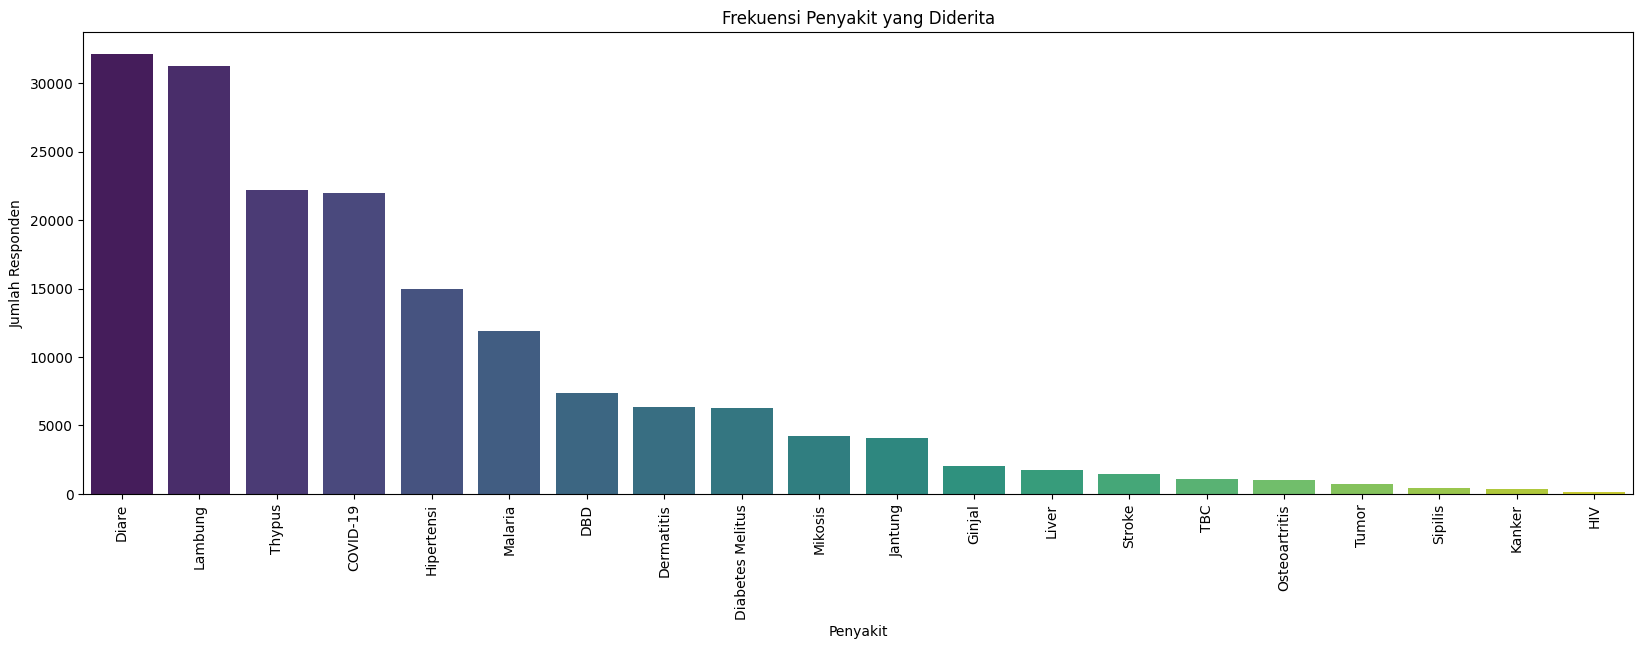

In [ ]:
jumlah_penyakit_urut = jumlah_penyakit.sort_values(ascending=False)
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.barplot(x=jumlah_penyakit_urut.index, y=jumlah_penyakit_urut.values, palette='viridis')
plt.title('Frekuensi Penyakit yang Diderita')
plt.xlabel('Penyakit')
plt.ylabel('Jumlah Responden')
plt.show()

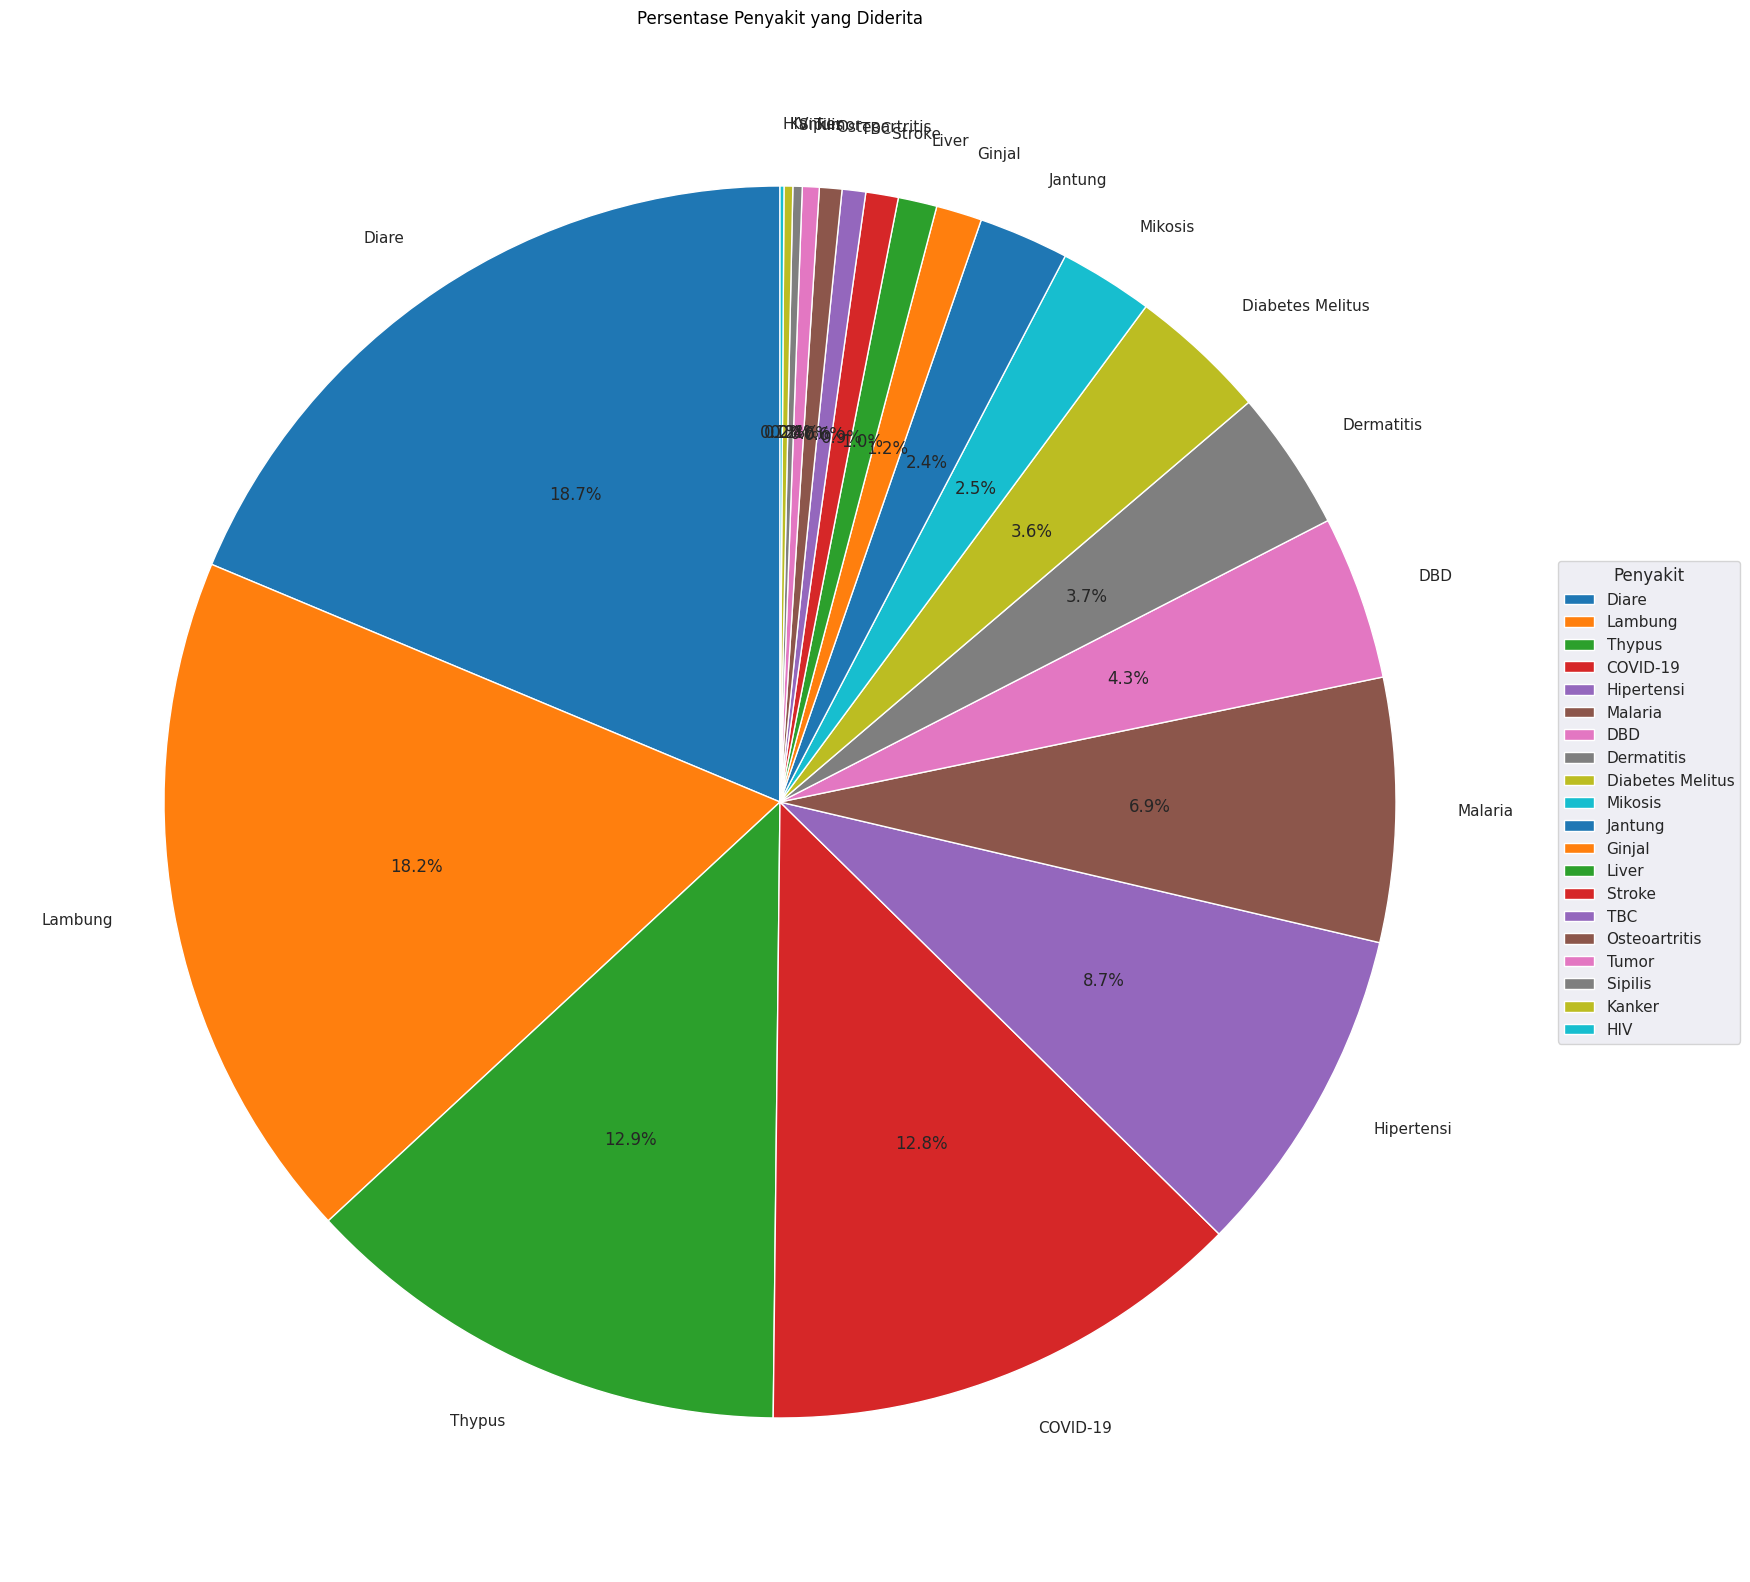

In [ ]:
plt.figure(figsize=(20, 20))
plt.title("Persentase Penyakit yang Diderita")

sns.set_theme(style="darkgrid")
plt.pie(jumlah_penyakit_urut, labels=jumlah_penyakit_urut.index, autopct='%1.1f%%', startangle=90)
plt.legend(jumlah_penyakit_urut.index, title="Penyakit", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

### **Kesehatan Mental**

In [ ]:
pd.options.display.max_columns = None
df_mental.head(10)

ID WILAYAH JENIS KELAMIN  NILAI IMT       IMT  USIA Kelompok Umur  \
0   1  KALBAR   LAKI - LAKI  29.796114  Obesitas  34.0       25 - 34   
1   2  KALBAR   LAKI - LAKI  24.364563    Normal  43.0       35 - 44   
2   3  KALBAR   LAKI - LAKI  20.883912    Normal  21.0       15 - 24   
3   4  KALBAR   LAKI - LAKI  28.753975  Obesitas  40.0       35 - 44   
4   5  KALBAR   LAKI - LAKI  22.911836    Normal  28.0       25 - 34   
5   6  KALBAR   LAKI - LAKI  23.000885    Normal  47.0       45 - 54   
6   7  KALBAR   LAKI - LAKI  25.006824     Gemuk  41.0       35 - 44   
7   8  KALBAR   LAKI - LAKI  22.710204    Normal  28.0       25 - 34   
8   9  KALBAR   LAKI - LAKI  24.868725    Normal  23.0       15 - 24   
9  10  KALBAR   LAKI - LAKI  29.937660  Obesitas  41.0       35 - 44   

  PENDIDIKAN TERAKHIR Status Perkawinan        PENGELUARAN/BULAN  \
0                 SMA           Menikah  Rp. 7 Juta s.d. 10 Juta   
1                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta   
2                 SMA     Belum Menikah   Rp. 2 Juta s.d. 6 Juta   
3                  S2           Menikah  Rp. 7 Juta s.d. 10 Juta   
4                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta   
5                 SMP           Menikah   Rp. 2 Juta s.d. 6 Juta   
6                  S1           Menikah   Rp. 2 Juta s.d. 6 Juta   
7                  S1           Menikah   Rp. 2 Juta s.d. 6 Juta   
8                 SMA     Belum Menikah   Rp. 2 Juta s.d. 6 Juta   
9                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta   

  Sering menderita sakit kepala ? Tidak nafsu makan ?    Sulit tidur ?  \
0                 Kadang - kadang               Tidak            Tidak   
1                           Tidak               Tidak            Tidak   
2                 Kadang - kadang               Tidak            Tidak   
3                           Tidak               Tidak            Tidak   
4                 Kadang - kadang               Tidak            Tidak   
5                 Kadang - kadang               Tidak  Kadang - kadang   
6                 Kadang - kadang               Tidak            Tidak   
7                           Tidak     Kadang - kadang  Kadang - kadang   
8                           Tidak               Tidak            Tidak   
9                 Kadang - kadang               Tidak            Tidak   

     Mudah takut ? Merasa tegang, cemas atau kuatir ? Tangan anda gemetar ?  \
0            Tidak                              Tidak                 Tidak   
1            Tidak                              Tidak                 Tidak   
2  Kadang - kadang                              Tidak                 Tidak   
3            Tidak                              Tidak                 Tidak   
4            Tidak                              Tidak                 Tidak   
5            Tidak                              Tidak                 Tidak   
6            Tidak                              Tidak                 Tidak   
7            Tidak                              Tidak                 Tidak   
8            Tidak                              Tidak                 Tidak   
9            Tidak                              Tidak                 Tidak   

  Pencernaan anda terganggu / buruk ? Sulit untuk berpikir jernih ?  \
0                               Tidak                         Tidak   
1                               Tidak                         Tidak   
2                               Tidak                         Tidak   
3                               Tidak                         Tidak   
4                               Tidak                         Tidak   
5                               Tidak                         Tidak   
6                               Tidak                         Tidak   
7                     Kadang - kadang                         Tidak   
8                               Tidak                         Tidak   
9                     Kadang - kadang                         Tida

In [ ]:
df_mental['Jumlah_Iya'] = (df_mental == 'Ya').sum(axis=1)
df_mental.head(10)

ID WILAYAH JENIS KELAMIN  NILAI IMT       IMT  USIA Kelompok Umur  \
0   1  KALBAR   LAKI - LAKI  29.796114  Obesitas  34.0       25 - 34   
1   2  KALBAR   LAKI - LAKI  24.364563    Normal  43.0       35 - 44   
2   3  KALBAR   LAKI - LAKI  20.883912    Normal  21.0       15 - 24   
3   4  KALBAR   LAKI - LAKI  28.753975  Obesitas  40.0       35 - 44   
4   5  KALBAR   LAKI - LAKI  22.911836    Normal  28.0       25 - 34   
5   6  KALBAR   LAKI - LAKI  23.000885    Normal  47.0       45 - 54   
6   7  KALBAR   LAKI - LAKI  25.006824     Gemuk  41.0       35 - 44   
7   8  KALBAR   LAKI - LAKI  22.710204    Normal  28.0       25 - 34   
8   9  KALBAR   LAKI - LAKI  24.868725    Normal  23.0       15 - 24   
9  10  KALBAR   LAKI - LAKI  29.937660  Obesitas  41.0       35 - 44   

  PENDIDIKAN TERAKHIR Status Perkawinan        PENGELUARAN/BULAN  \
0                 SMA           Menikah  Rp. 7 Juta s.d. 10 Juta   
1                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta   
2                 SMA     Belum Menikah   Rp. 2 Juta s.d. 6 Juta   
3                  S2           Menikah  Rp. 7 Juta s.d. 10 Juta   
4                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta   
5                 SMP           Menikah   Rp. 2 Juta s.d. 6 Juta   
6                  S1           Menikah   Rp. 2 Juta s.d. 6 Juta   
7                  S1           Menikah   Rp. 2 Juta s.d. 6 Juta   
8                 SMA     Belum Menikah   Rp. 2 Juta s.d. 6 Juta   
9                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta   

  Sering menderita sakit kepala ? Tidak nafsu makan ?    Sulit tidur ?  \
0                 Kadang - kadang               Tidak            Tidak   
1                           Tidak               Tidak            Tidak   
2                 Kadang - kadang               Tidak            Tidak   
3                           Tidak               Tidak            Tidak   
4                 Kadang - kadang               Tidak            Tidak   
5                 Kadang - kadang               Tidak  Kadang - kadang   
6                 Kadang - kadang               Tidak            Tidak   
7                           Tidak     Kadang - kadang  Kadang - kadang   
8                           Tidak               Tidak            Tidak   
9                 Kadang - kadang               Tidak            Tidak   

     Mudah takut ? Merasa tegang, cemas atau kuatir ? Tangan anda gemetar ?  \
0            Tidak                              Tidak                 Tidak   
1            Tidak                              Tidak                 Tidak   
2  Kadang - kadang                              Tidak                 Tidak   
3            Tidak                              Tidak                 Tidak   
4            Tidak                              Tidak                 Tidak   
5            Tidak                              Tidak                 Tidak   
6            Tidak                              Tidak                 Tidak   
7            Tidak                              Tidak                 Tidak   
8            Tidak                              Tidak                 Tidak   
9            Tidak                              Tidak                 Tidak   

  Pencernaan anda terganggu / buruk ? Sulit untuk berpikir jernih ?  \
0                               Tidak                         Tidak   
1                               Tidak                         Tidak   
2                               Tidak                         Tidak   
3                               Tidak                         Tidak   
4                               Tidak                         Tidak   
5                               Tidak                         Tidak   
6                               Tidak                         Tidak   
7                     Kadang - kadang                         Tidak   
8                               Tidak                         Tidak   
9                     Kadang - kadang                         Tida

In [ ]:
# Kategorisasi Kesehatan Mental
df_mental['Kesehatan Mental'] = df_mental['Jumlah_Iya'].apply(lambda value: 'Normal' if value <= 7 else
                                                  'Perlu Perhatian Khusus')

In [ ]:
df_mental['Kesehatan Mental'].value_counts()

Normal                    289199
Perlu Perhatian Khusus       602
Name: Kesehatan Mental, dtype: int64

Dari kategorisasi berdasarkan Riskesdas, dapat dilihat bahwa 289.199 individu mempunyai kesehatan mental yang normal dan 602 individu butuh perhatian khusus terhadap kondisi mentalnya.

In [ ]:
# Membuat Dummy
dummy_mental = pd.get_dummies(df_mental, columns=['Sering menderita sakit kepala ?', 'Tidak nafsu makan ?',
                                                  'Sulit tidur ?',	'Mudah takut ?',	'Merasa tegang, cemas atau kuatir ?',
                                                  'Tangan anda gemetar ?',	'Pencernaan anda terganggu / buruk ?',
                                                  'Sulit untuk berpikir jernih ?',	'Merasa tidak bahagia ?',
                                                  'Menangis lebih sering ?',	'Sulit untuk mengambil keputusan ?',
                                                  'Pekerjaan anda sehari – hari terganggu ?',	'Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?',
                                                  'Kehilangan minat pada berbagai hal ?',	'Tidak merasa berharga?',	'Mempunyai pikiran untuk mengakhiri hidup?',
                                                  'Merasa lelah sepanjang waktu?',	'Mengalami rasa tidak enak di perut?',	'Mudah lelah ?',	'Apakah saudara merokok ?',
                                                  'Jika Ya, Berapa Batang Saudara merokok dalam sehari?',	'Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?',
                                                  'Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?'],
                             prefix=['SakitKepala','TidakNafsuMakan', 'SulitTidur', 'MudahTakut', 'TegangCemas', 'TanganGemetar', 'PencernaanBuruk',
                                     'SulitBerpikir', 'TidakBahagia', 'SeringMenangis', 'SulitKeputusan', 'AktivitasTerganggu','TidakBermanfaat',
                                     'HilangMinat','TidakBerharga','AkhiriHidup','SelaluLelah','AnehPerut','MudahLelah','Merokok','BerapaRokok','BerapaGula','BerapaAlkohol'])
dummy_mental.head(10)

ID WILAYAH JENIS KELAMIN  NILAI IMT       IMT  USIA Kelompok Umur  \
0   1  KALBAR   LAKI - LAKI  29.796114  Obesitas  34.0       25 - 34   
1   2  KALBAR   LAKI - LAKI  24.364563    Normal  43.0       35 - 44   
2   3  KALBAR   LAKI - LAKI  20.883912    Normal  21.0       15 - 24   
3   4  KALBAR   LAKI - LAKI  28.753975  Obesitas  40.0       35 - 44   
4   5  KALBAR   LAKI - LAKI  22.911836    Normal  28.0       25 - 34   
5   6  KALBAR   LAKI - LAKI  23.000885    Normal  47.0       45 - 54   
6   7  KALBAR   LAKI - LAKI  25.006824     Gemuk  41.0       35 - 44   
7   8  KALBAR   LAKI - LAKI  22.710204    Normal  28.0       25 - 34   
8   9  KALBAR   LAKI - LAKI  24.868725    Normal  23.0       15 - 24   
9  10  KALBAR   LAKI - LAKI  29.937660  Obesitas  41.0       35 - 44   

  PENDIDIKAN TERAKHIR Status Perkawinan        PENGELUARAN/BULAN  Jumlah_Iya  \
0                 SMA           Menikah  Rp. 7 Juta s.d. 10 Juta           1   
1                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta           0   
2                 SMA     Belum Menikah   Rp. 2 Juta s.d. 6 Juta           0   
3                  S2           Menikah  Rp. 7 Juta s.d. 10 Juta           0   
4                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta           1   
5                 SMP           Menikah   Rp. 2 Juta s.d. 6 Juta           1   
6                  S1           Menikah   Rp. 2 Juta s.d. 6 Juta           0   
7                  S1           Menikah   Rp. 2 Juta s.d. 6 Juta           0   
8                 SMA     Belum Menikah   Rp. 2 Juta s.d. 6 Juta           0   
9                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta           2   

  Kesehatan Mental  SakitKepala_Kadang - kadang  SakitKepala_Tidak  \
0           Normal                            1                  0   
1           Normal                            0                  1   
2           Normal                            1                  0   
3           Normal                            0                  1   
4           Normal                            1                  0   
5           Normal                            1                  0   
6           Normal                            1                  0   
7           Normal                            0                  1   
8           Normal                            0                  1   
9           Normal                            1                  0   

   SakitKepala_Ya  TidakNafsuMakan_Kadang - kadang  TidakNafsuMakan_Tidak  \
0               0                                0                      1   
1               0                                0                      1   
2               0                                0                      1   
3               0                                0                      1   
4               0                                0                      1   
5               0                                0                      1   
6               0                                0                      1   
7               0                                1                      0   
8               0                                0                      1   
9               0                                0                      1   

   TidakNafsuMakan_Ya  SulitTidur_Kadang - kadang  SulitTidur_Tidak  \
0                   0                           0                 1   
1                   0                           0                 1   
2                   0                           0                 1   
3                   0                           0                 1   
4                   0                           0                 1   
5                   0                           1                 0   
6                   0                           0                 1   
7                   0                           1                 0   
8                   0                           0                 1   


Akan dicek apakah pengkategorisasian berdasarkan Riskesdas sudah tepat dengan melihat akurasi dan presisi pada metode klasifikasi SVM, Decision Tree, dan K-NN.

In [ ]:
X = dummy_mental.drop(columns = ['Kesehatan Mental','ID','WILAYAH','JENIS KELAMIN','NILAI IMT','IMT','USIA','Kelompok Umur','PENDIDIKAN TERAKHIR','Status Perkawinan', 'PENGELUARAN/BULAN','Jumlah_Iya'], axis=1)  # Matriks fitur
y = dummy_mental['Kesehatan Mental']  # Vektor target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Metode SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Latih model pada set pelatihan
svm_model.fit(X_train, y_train)

# Prediksi pada set pengujian
y_pred = svm_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
                         precision    recall  f1-score   support

                Normal       1.00      1.00      1.00     57850
Perlu Perhatian Khusus       1.00      1.00      1.00       111

              accuracy                           1.00     57961
             macro avg       1.00      1.00      1.00     57961
          weighted avg       1.00      1.00      1.00     57961



#### **Metode Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model pada set pelatihan
dt_model.fit(X_train, y_train)

# Prediksi pada set pengujian
y_pred = dt_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9988095443487862
Classification Report:
                         precision    recall  f1-score   support

                Normal       1.00      1.00      1.00     57850
Perlu Perhatian Khusus       0.69      0.68      0.69       111

              accuracy                           1.00     57961
             macro avg       0.85      0.84      0.84     57961
          weighted avg       1.00      1.00      1.00     57961



#### **Metode K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model K-NN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Latih model pada set pelatihan
knn_model.fit(X_train, y_train)

# Prediksi pada set pengujian
y_pred = knn_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9991373509773813
Classification Report:
                         precision    recall  f1-score   support

                Normal       1.00      1.00      1.00     57850
Perlu Perhatian Khusus       0.93      0.59      0.73       111

              accuracy                           1.00     57961
             macro avg       0.96      0.80      0.86     57961
          weighted avg       1.00      1.00      1.00     57961



In [ ]:
df_mental['Kesehatan Mental'].value_counts()

Normal                    289199
Perlu Perhatian Khusus       602
Name: Kesehatan Mental, dtype: int64

Karena ketiga metode menghasilkan akurasi lebih dari 99%, maka kategorisasi tersebut cocok dan akan digunakan dalam analisis selanjutnya.

#### **Eksplorasi Demografis**

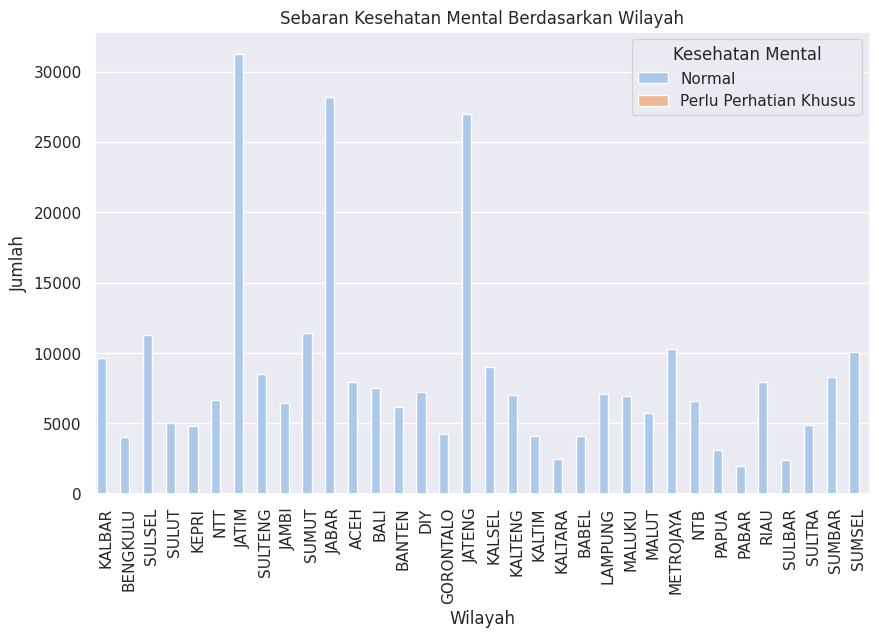

In [ ]:
# melihat jumlah penyakit mental di tiap wilayah
plt.figure(figsize=(10,6))

sns.countplot(x='WILAYAH', hue='Kesehatan Mental', data=df_mental, palette='pastel')
plt.title('Sebaran Kesehatan Mental Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.legend(title='Kesehatan Mental')
plt.xticks(rotation = 90)
plt.show()

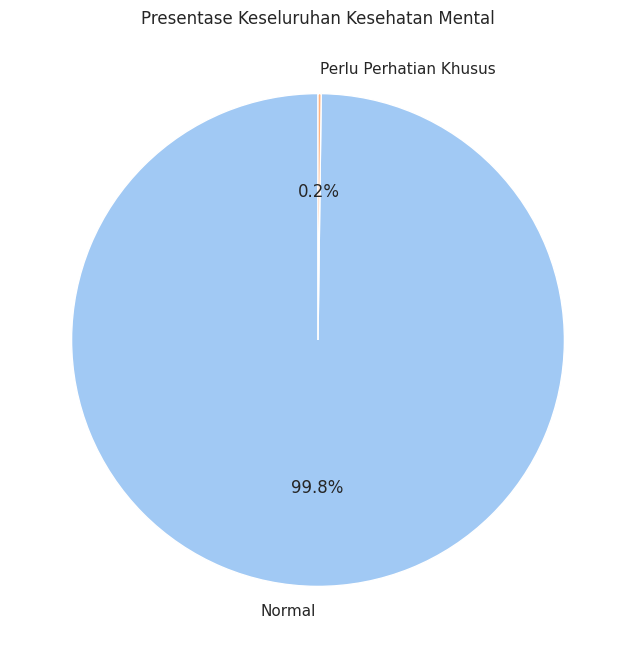

In [ ]:
# Hitung presentase keseluruhan Kesehatan mental
percentage_total = df_mental['Kesehatan Mental'].value_counts(normalize=True) * 100

# Plot pie chart untuk sebaran Kesehatan mental keseluruhan
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel', len(percentage_total))
plt.pie(percentage_total, labels=percentage_total.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Presentase Keseluruhan Kesehatan Mental')
plt.show()

In [ ]:
percentage_total

Normal                    99.792271
Perlu Perhatian Khusus     0.207729
Name: Kesehatan Mental, dtype: float64

In [ ]:
mental_buruk = df_mental[df_mental['Kesehatan Mental'] == 'Perlu Perhatian Khusus']
mental_buruk

ID    WILAYAH JENIS KELAMIN  NILAI IMT           IMT  USIA  \
41          42      JATIM   LAKI - LAKI  23.529412        Normal  53.0   
106        107      SUMUT   LAKI - LAKI  28.823054      Obesitas  51.0   
692        693  METROJAYA   LAKI - LAKI  28.344671      Obesitas  46.0   
915        916    LAMPUNG   LAKI - LAKI  25.390625         Gemuk  44.0   
1229      1230     JATENG   LAKI - LAKI  22.258953        Normal  51.0   
1250      1251      JABAR   LAKI - LAKI  21.901834        Normal  20.0   
1267      1268     JATENG   LAKI - LAKI  21.487889        Normal  45.0   
1390      1391        NTT   LAKI - LAKI  11.755102  Sangat Kurus  20.0   
1671      1672      PAPUA   LAKI - LAKI  22.846174        Normal  45.0   
1839      1840      JATIM   LAKI - LAKI  24.167162        Normal  43.0   
2131      2132     SULTRA   LAKI - LAKI  27.217303      Obesitas  38.0   
2595      2596      MALUT   LAKI - LAKI  23.529412        Normal  23.0   
2602      2603    SULTENG   LAKI - LAKI  27.774423      Obesitas  37.0   
2999      3000    KALTARA   LAKI - LAKI  39.792388      Obesitas  50.0   
3011      3012  METROJAYA   LAKI - LAKI  39.682540      Obesitas  41.0   
3025      3026  METROJAYA   LAKI - LAKI  39.519741      Obesitas  38.0   
3080      3081      JATIM     PEREMPUAN  39.111111      Obesitas  48.0   
3154      3155      SUMUT   LAKI - LAKI  38.567493      Obesitas  40.0   
4131      4132     SULSEL   LAKI - LAKI  35.671819      Obesitas  37.0   
5013      5014      SUMUT   LAKI - LAKI  34.662652      Obesitas  41.0   
5154      5155  GORONTALO   LAKI - LAKI  34.602076      Obesitas  37.0   
5635      5636     KALSEL   LAKI - LAKI  34.186991      Obesitas  26.0   
5701      5702     KALBAR   LAKI - LAKI  34.063609      Obesitas  45.0   
5714      5715        NTT   LAKI - LAKI  34.063609      Obesitas  49.0   
5782      5783       BALI   LAKI - LAKI  34.063609      Obesitas  56.0   
6186      6187      SULUT   LAKI - LAKI  33.802055      Obesitas  24.0   
6333      6334      BABEL   LAKI - LAKI  33.742423      Obesitas  27.0   
6430      6431      JATIM   LAKI - LAKI  33.659297      Obesitas  40.0   
6503      6504     JATENG   LAKI - LAKI  33.659297      Obesitas  40.0   
6625      6626     JATENG   LAKI - LAKI  33.593750      Obesitas  37.0   
6705      6706      JABAR   LAKI - LAKI  33.515273      Obesitas  35.0   
6891      6892      SULUT   LAKI - LAKI  33.412409      Obesitas  34.0   
7214      7215    KALTENG   LAKI - LAKI  33.262141      Obesitas  29.0   
7474      7475      JATIM   LAKI - LAKI  33.126014      Obesitas  47.0   
7559      7560       ACEH   LAKI - LAKI  33.090422      Obesitas  43.0   
8159      8160     SULBAR   LAKI - LAKI  32.912013      Obesitas  34.0   
8331      8332      JAMBI   LAKI - LAKI  32.871972      Obesitas  44.0   
8708      8709  METROJAYA   LAKI - LAKI  32.830615      Obesitas  29.0   
8713      8714     SUMSEL   LAKI - LAKI  32.830615      Obesitas  36.0   
8865      8866     JATENG   LAKI - LAKI  32.744161      Obesitas  37.0   
9732      9733     KALSEL   LAKI - LAKI  32.449973      Obesitas  33.0   
9804      9805     JATENG   LAKI - LAKI  32.407407      Obesitas  46.0   
10382    10383  METROJAYA   LAKI - LAKI  32.270788      Obesitas  54.0   
10423    10424     SUMBAR   LAKI - LAKI  32.270788      Obesitas  39.0   
10782    10783       BALI   LAKI - LAKI  32.111952      Obesitas  41.0   
10839    10840      BABEL   LAKI - LAKI  32.111952      Obesitas  27.0   
10886    10887     SUMBAR   LAKI - LAKI  32.111952      Obesitas  35.0   
10959    10960      JATIM     PEREMPUAN  32.049948      Obesitas  55.0   
11127    11128     KALBAR   LAKI - LAKI  31.992171      Obesitas  40.0   
12323    12324      JABAR   LAKI - LAKI  31.773932      Obesitas  49.0   
12710    12711      SUMUT   LAKI - LAKI  31.637397      Obesitas  57.0   
12823    12824      SUMUT   LAKI - LAKI  31.603212      Obesitas  30.0   
13148    13149     KALSEL   LAKI - LAKI  31.553659      Obesitas  40.0   
13883    13884  

##### **Kesehatan Mental Kurang Baik**

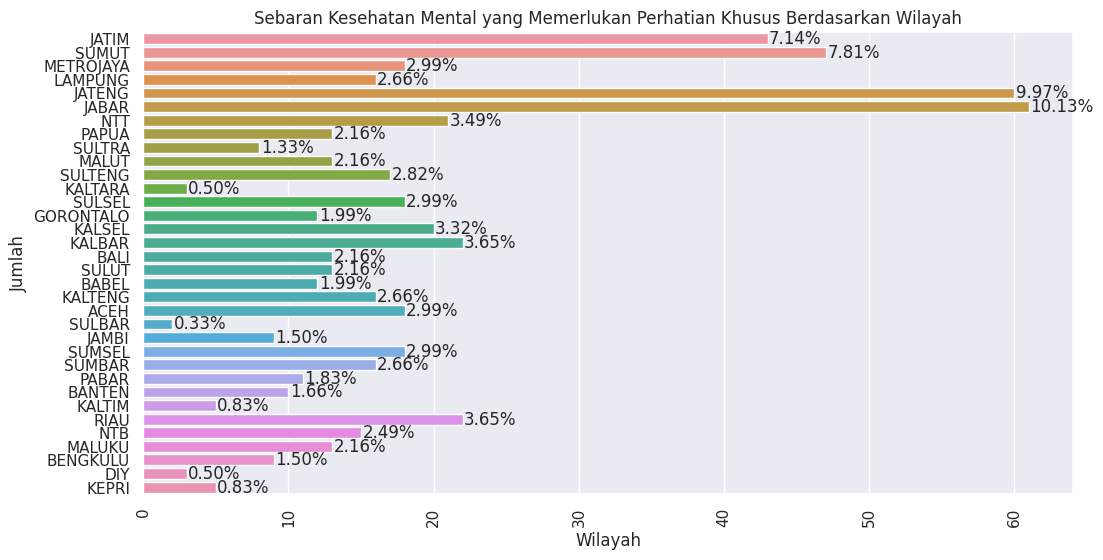

In [ ]:
# melihat mental yang perlu perhatian khusus di tiap wilayah
plt.figure(figsize=(12,6))

ax = sns.countplot(y='WILAYAH', data=mental_buruk)
plt.title('Sebaran Kesehatan Mental yang Memerlukan Perhatian Khusus Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
plt.xticks(rotation = 90)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    ax.text(width + 0.1, p.get_y() + height / 2., f'{width / len(mental_buruk) * 100:.2f}%',
            ha='left', va='center')

plt.show()

##### **Kelompok Umur dengan Mental Kurang Baik**

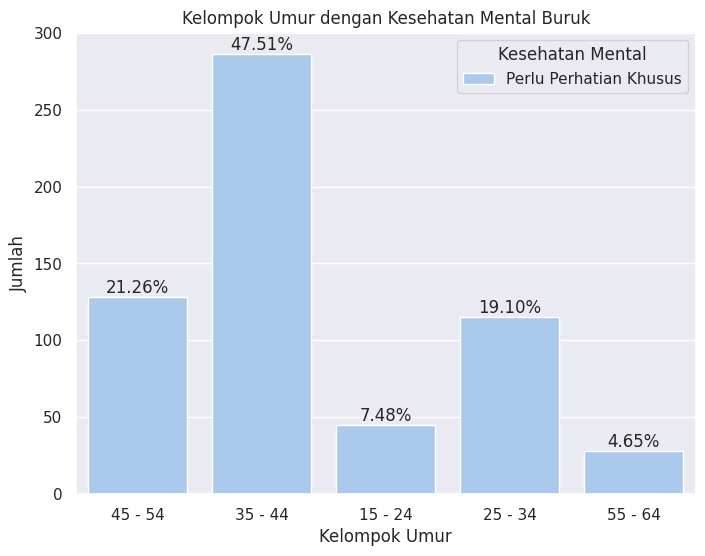

In [ ]:
# Plot countplot untuk membandingkan kelompok umur dengan kategori mental yang perlu perhatian khusus
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Kelompok Umur', hue='Kesehatan Mental', data=mental_buruk, palette='pastel')
plt.title('Kelompok Umur dengan Kesehatan Mental Buruk')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah')
plt.legend(title='Kesehatan Mental')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.text(p.get_x() + width / 2., height + 0.1, f'{height / len(mental_buruk) * 100:.2f}%',
            ha='center', va='bottom', rotation=0)

plt.show()

Kelompok umur yang mempunyai mental kurang baik adalah umur 35-44. Walaupun terlihat sepele, individu-individu pada rentang umur ini perlu memperhatikan kesehatan mentalnya lebih baik lagi agar tidak terjadi hal-hal yang tidak diinginkan.

##### **Jenis Kelamin dengan Kesehatan Mental Kurang Baik**

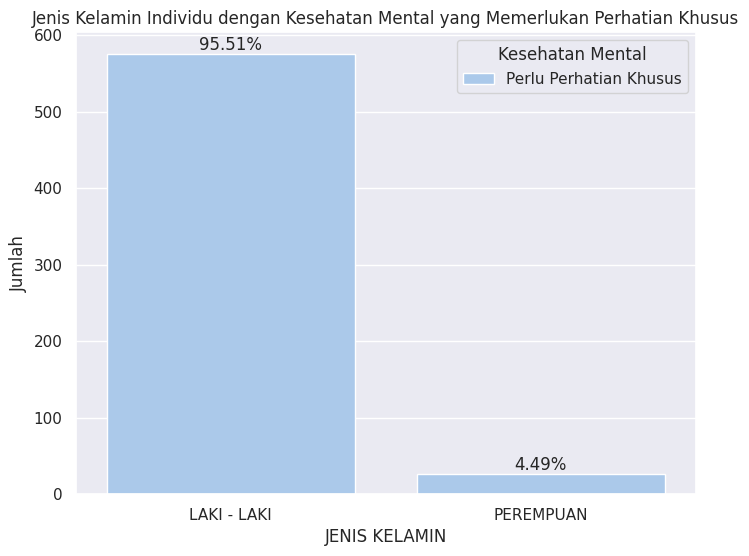

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='JENIS KELAMIN', hue='Kesehatan Mental', data=mental_buruk, palette='pastel')
plt.title('Jenis Kelamin Individu dengan Kesehatan Mental yang Memerlukan Perhatian Khusus')
plt.xlabel('JENIS KELAMIN')
plt.ylabel('Jumlah')
plt.legend(title='Kesehatan Mental')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.text(p.get_x() + width / 2., height + 0.1, f'{height / len(mental_buruk) * 100:.2f}%',
            ha='center', va='bottom', rotation=0)

plt.show()

##### **Status Pernikahan dengan Kesehatan Mental Kurang Baik**

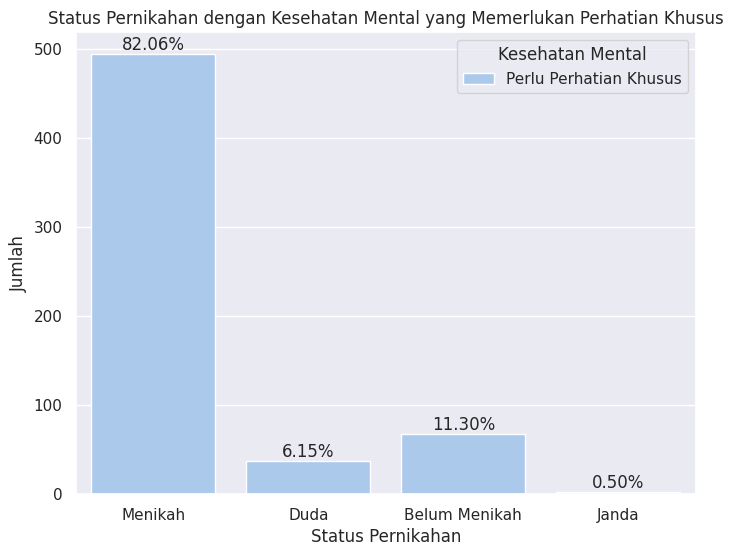

In [ ]:
# Plot countplot untuk membandingkan status pernikahan dengan kategori mental yang perlu perhatian khusus
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Status Perkawinan', hue='Kesehatan Mental', data=mental_buruk, palette='pastel')
plt.title('Status Pernikahan dengan Kesehatan Mental yang Memerlukan Perhatian Khusus')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah')
plt.legend(title='Kesehatan Mental')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.text(p.get_x() + width / 2., height + 0.1, f'{height / len(mental_buruk) * 100:.2f}%',
            ha='center', va='bottom', rotation=0)

plt.show()

Dapat dilihat bahwa individu yang sudah menikah lebih banyak mempunyai kesehatan yang kurang baik. Di tengah sibuknya mengurus rumah tangga, perlu diperhatikan pula kesehatan mental individu.

### **Obesitas**

In [ ]:
! gdown 177gpn4q9tNQJmu3gVxmbcXsa_8D2_3Ns

Downloading...
From: https://drive.google.com/uc?id=177gpn4q9tNQJmu3gVxmbcXsa_8D2_3Ns
To: /content/data_obesitas.xlsx
100% 15.1M/15.1M [00:00<00:00, 130MB/s]


In [ ]:
df_obesitas = pd.read_excel('/content/data_obesitas.xlsx')

In [ ]:
df_obesitas.head()

ID WILAYAH JENIS KELAMIN  NILAI IMT       IMT Kelompok Umur  \
0   1  KALBAR   LAKI - LAKI  29.796114  Obesitas       25 - 34   
1   2  KALBAR   LAKI - LAKI  24.364563    Normal       35 - 44   
2   3  KALBAR   LAKI - LAKI  20.883912    Normal       15 - 24   
3   4  KALBAR   LAKI - LAKI  28.753975  Obesitas       35 - 44   
4   5  KALBAR   LAKI - LAKI  22.911836    Normal       25 - 34   

  PENDIDIKAN TERAKHIR  \
0                 SMA   
1                 SMA   
2                 SMA   
3                  S2   
4                 SMA   

  Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?  \
0                           Kurang dari 6 sendok teh                   
1                                       Tidak pernah                   
2                           Kurang dari 6 sendok teh                   
3                            Lebih dari 6 sendok teh                   
4                           Kurang dari 6 sendok teh                   

  Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari  \
0                                    1 - 2 kali/hari                                          
1                                       Tidak pernah                                          
2                                    1 - 2 kali/hari                                          
3                                    1 - 2 kali/hari                                          
4                                    1 - 2 kali/hari                                          

  Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?  \
0                                       Tidak pernah           
1                                       Tidak pernah           
2                                       Tidak pernah           
3                                       Tidak pernah           
4                                       Tidak pernah           

  Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?  \
0                   4 kali atau lebih dalam seminggu               
1                   4 kali atau lebih dalam seminggu               
2                   4 kali atau lebih dalam seminggu               
3                  Kurang dari 4 kali dalam seminggu               
4                  Kurang dari 4 kali dalam seminggu               

  Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?  \
0                                          Tidak ada                                                             
1                                          Tidak ada                                                             
2                                          Tidak ada                                                             
3                                          Tidak ada                                                             
4                                                Ada                                                             

  Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?  
0                                  Kurang dari 400gr                 
1                                  Kurang dari 400gr                 
2                                        400gr/lebih                 
3                                  Kurang dari 400gr                 
4                                  Kurang dari 400gr

In [ ]:
count_imt = df_obesitas['IMT'].value_counts()
count_imt

Normal          138961
Obesitas         82360
Gemuk            67319
Kurus              919
Sangat Kurus       242
Name: IMT, dtype: int64

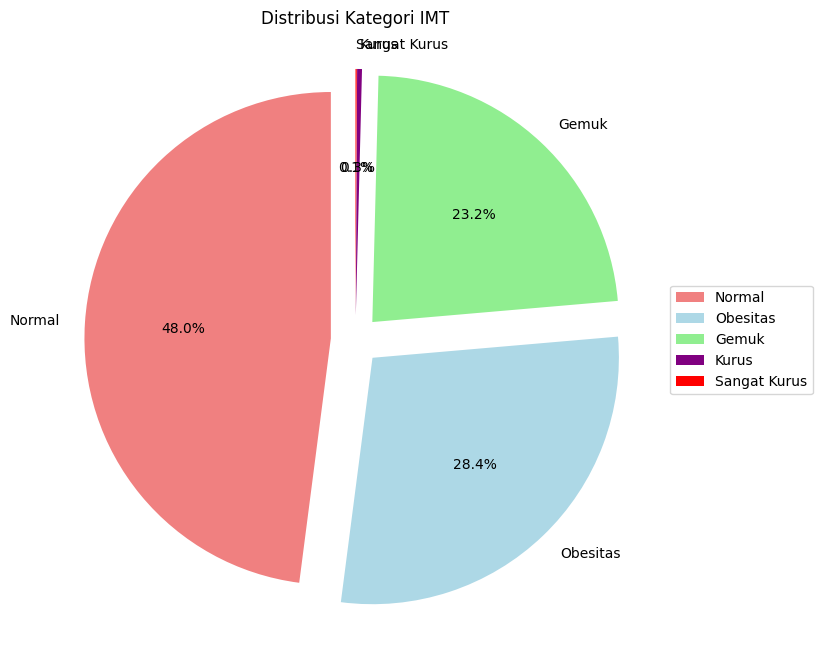

In [ ]:
colors = ['lightcoral', 'lightblue', 'lightgreen', 'purple', 'red']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]  # Equal explode for all slices
labels = count_imt.index
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(count_imt, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribusi Kategori IMT')
plt.show()

In [ ]:
percentage_imt = df_obesitas['IMT'].value_counts(normalize=True) * 100
percentage_imt

Normal          47.950490
Obesitas        28.419502
Gemuk           23.229388
Kurus            0.317114
Sangat Kurus     0.083506
Name: IMT, dtype: float64

Dapat dilihat bahwa dari 289.801 individu, 28,4% atau sekitar 82.300 orang adalah penderita obesitas dan 23.2% atau sekitar 67.300 orang berbadan gemuk.

#### **Demografi Individu yang Terkena Obesitas**

In [ ]:
df_obe = df_obesitas[df_obesitas['IMT'] == 'Obesitas']

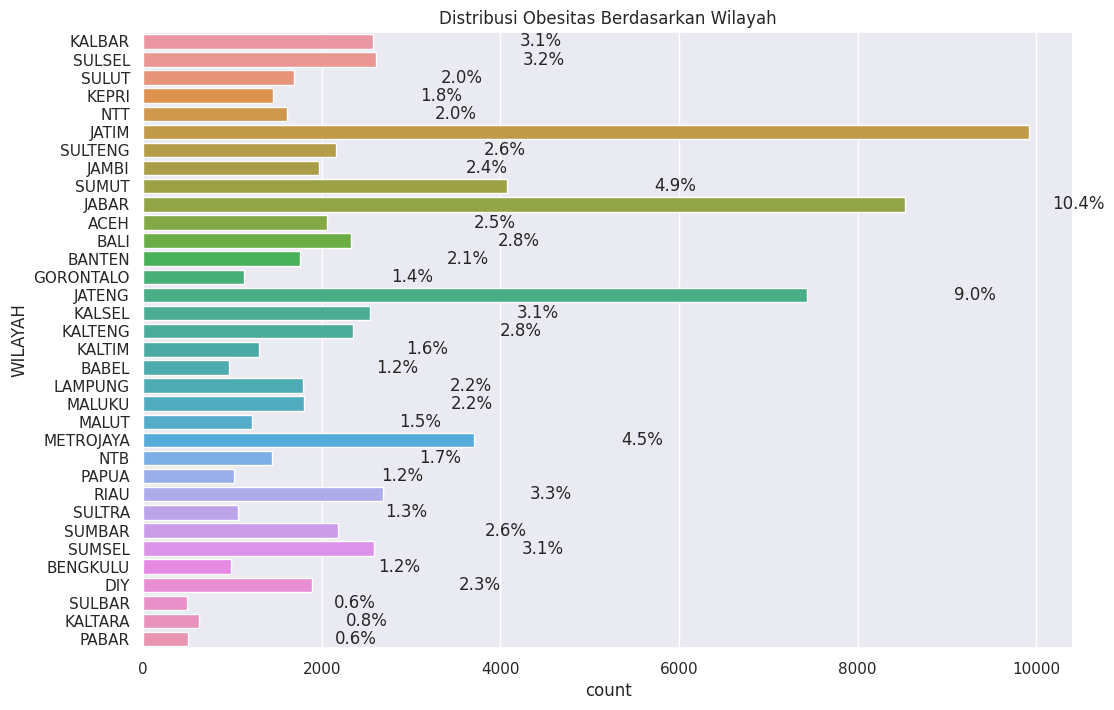

In [ ]:
# Visualisasi Seaborn untuk melihat distribusi obesitas berdasarkan wilayah
plt.figure(figsize=(12,8))
ax1 = sns.countplot(y='WILAYAH', data=df_obe)
plt.title('Distribusi Obesitas Berdasarkan Wilayah')
total_data_wilayah = len(df_obe)
for p1 in ax1.patches:
    percentage_wilayah = '{:.1f}%'.format(100 * p1.get_width() / total_data_wilayah)
    x1 = p1.get_width() + 0.02 * total_data_wilayah
    y1 = p1.get_y() + p1.get_height() / 2
    ax1.annotate(percentage_wilayah, (x1, y1), va='center')

plt.show()

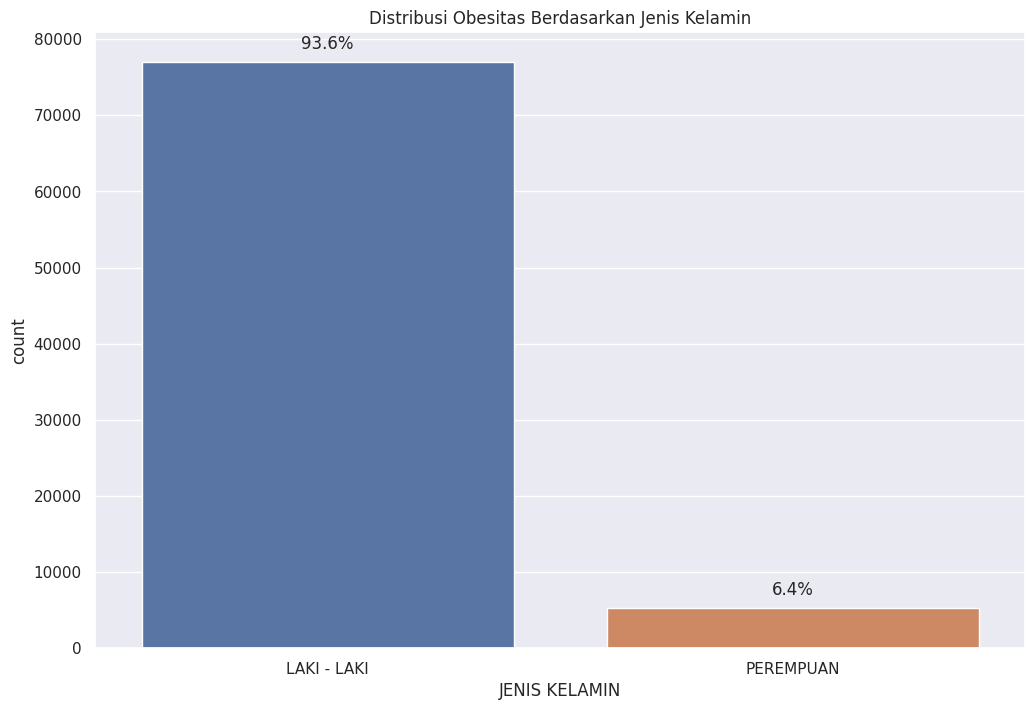

In [ ]:
# Visualisasi Seaborn untuk melihat distribusi obesitas berdasarkan jenis kelamin
plt.figure(figsize=(12,8))
ax = sns.countplot(x='JENIS KELAMIN', data=df_obe)
plt.title('Distribusi Obesitas Berdasarkan Jenis Kelamin')
total_data = len(df_obe)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_data)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02 * total_data
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

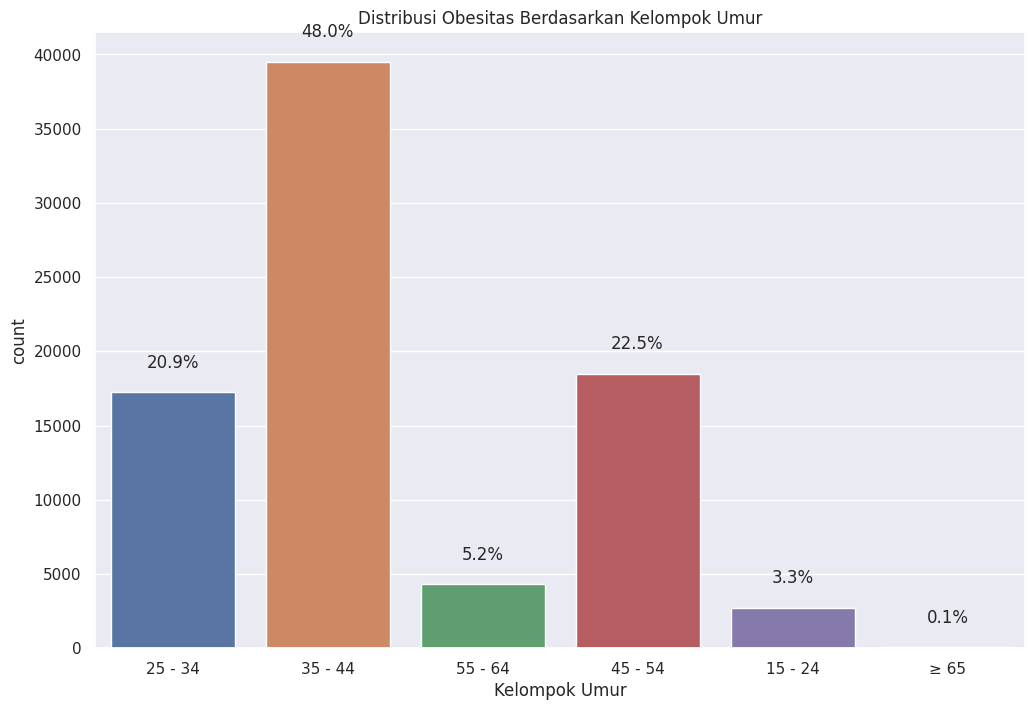

In [ ]:
# Visualisasi Seaborn untuk melihat distribusi obesitas berdasarkan kelompok umur
plt.figure(figsize=(12,8))
ax3 = sns.countplot(x='Kelompok Umur', data=df_obe)
plt.title('Distribusi Obesitas Berdasarkan Kelompok Umur')
total_data_umur = len(df_obe)
for p3 in ax3.patches:
    percentage_umur = '{:.1f}%'.format(100 * p3.get_height() / total_data_umur)
    x3 = p3.get_x() + p3.get_width() / 2
    y3 = p3.get_height() + 0.02 * total_data_umur
    ax3.annotate(percentage_umur, (x3, y3), ha='center')

plt.show()

Dapat dilihat bahwa dari 82.360 individu penderita obesitas, 12% berada di wilayah Jawa Timur, 93,6% berjenis kelamin laki-laki, dan 48,0% berada di kelompok umur 35 - 44 tahun. Dapat diketahui juga bahwa tiga wilayah dengan jumlah penderita obesitas terbanyak berada di pulau Jawa, yaitu Jawa Timur, Jawa Barat, dan Jawa Tengah.

In [ ]:
gorengan_obe = df_obe['Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari'].value_counts()
gorengan_obe

1 - 2 kali/hari        53239
Tidak pernah           26333
Di atas 2 kali/hari     2788
Name: Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari, dtype: int64

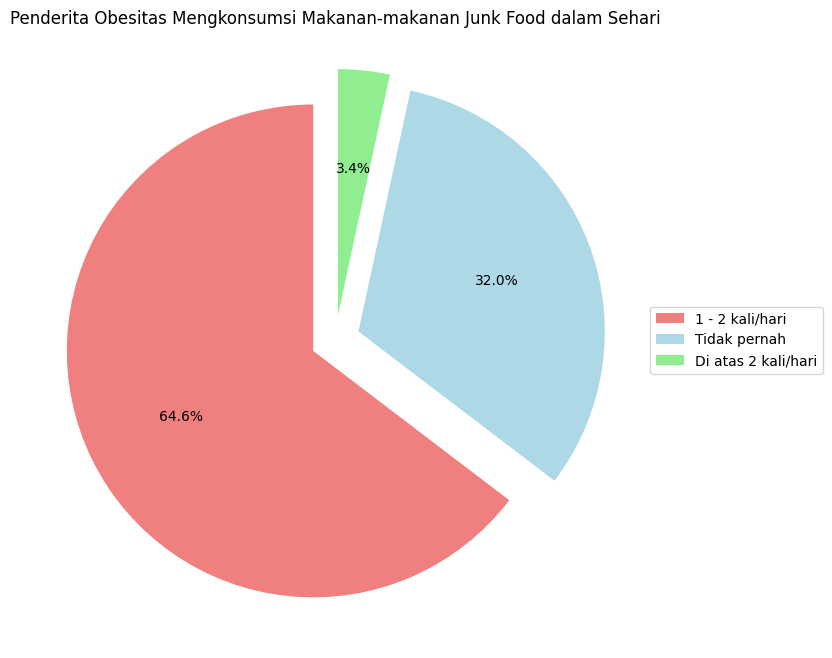

In [ ]:
colors = ['lightcoral', 'lightblue', 'lightgreen', 'purple', 'red']
explode = [0.1, 0.1, 0.1]  # Equal explode for all slices
labels = gorengan_obe.index
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(gorengan_obe, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Penderita Obesitas Mengkonsumsi Makanan-makanan Junk Food dalam Sehari')
plt.show()

Dapat dilihat bahwa individu yang menderita obesitas kebanyakan **mengonsumsi junk food 1-2 kali** dalam sehari.

In [ ]:
gula_obe = df_obe['Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?'].value_counts()
gula_obe

Kurang dari 6 sendok teh    69629
Tidak pernah                 9285
Lebih dari 6 sendok teh      3446
Name: Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?, dtype: int64

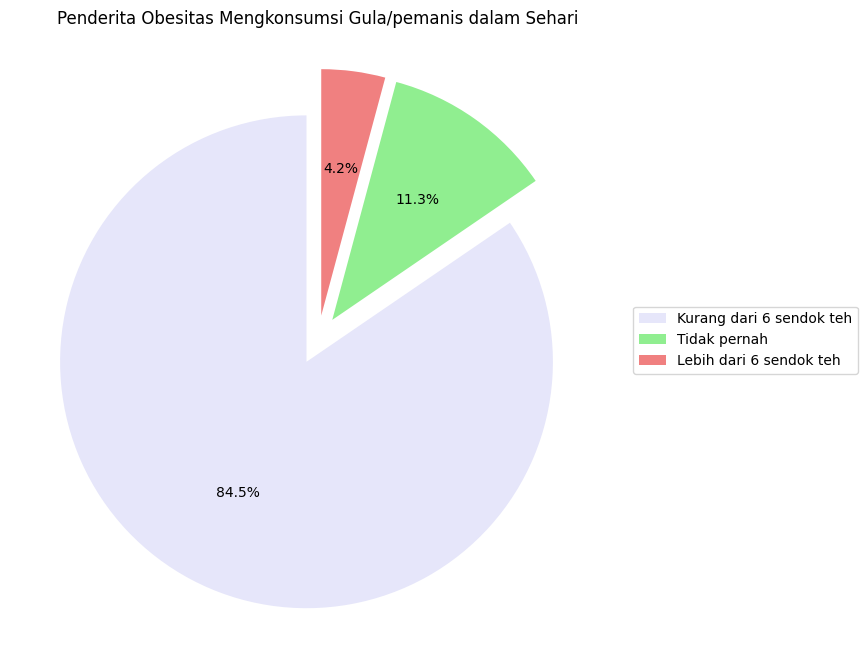

In [ ]:
colors = ['lavender', 'lightgreen', 'lightcoral']
explode = [0.1, 0.1, 0.1]  # Equal explode for all slices
labels = gula_obe.index
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(gula_obe, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Penderita Obesitas Mengkonsumsi Gula/pemanis dalam Sehari')
plt.show()

Dapat dilihat bahwa individu yang menderita obesitas kebanyakan **mengonsumsi gula/pemanis kurang dari 6 sendok teh** dalam sehari.

In [ ]:
sayur_obe = df_obe['Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?'].value_counts()
sayur_obe

Kurang dari 400gr    42901
400gr/lebih          38562
Tidak pernah           897
Name: Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?, dtype: int64

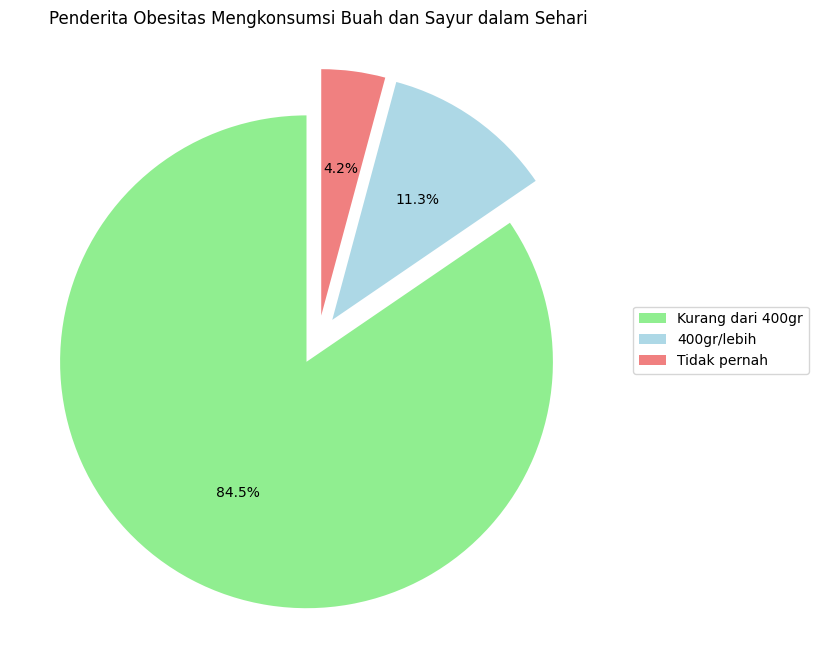

In [ ]:
colors = ['lightgreen', 'lightblue', 'lightcoral', 'purple', 'red']
explode = [0.1, 0.1, 0.1]  # Equal explode for all slices
labels = sayur_obe.index
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(gula_obe, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Penderita Obesitas Mengkonsumsi Buah dan Sayur dalam Sehari')
plt.show()

Dapat dilihat bahwa individu yang menderita obesitas kebanyakan **mengonsumsi sayur dan buah kurang dari 400 gr** dalam sehari.

In [ ]:
olah_obe = df_obe['Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?'].value_counts()
olah_obe

Kurang dari 4 kali dalam seminggu    54333
4 kali atau lebih dalam seminggu     23544
Tidak pernah                          4483
Name: Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?, dtype: int64

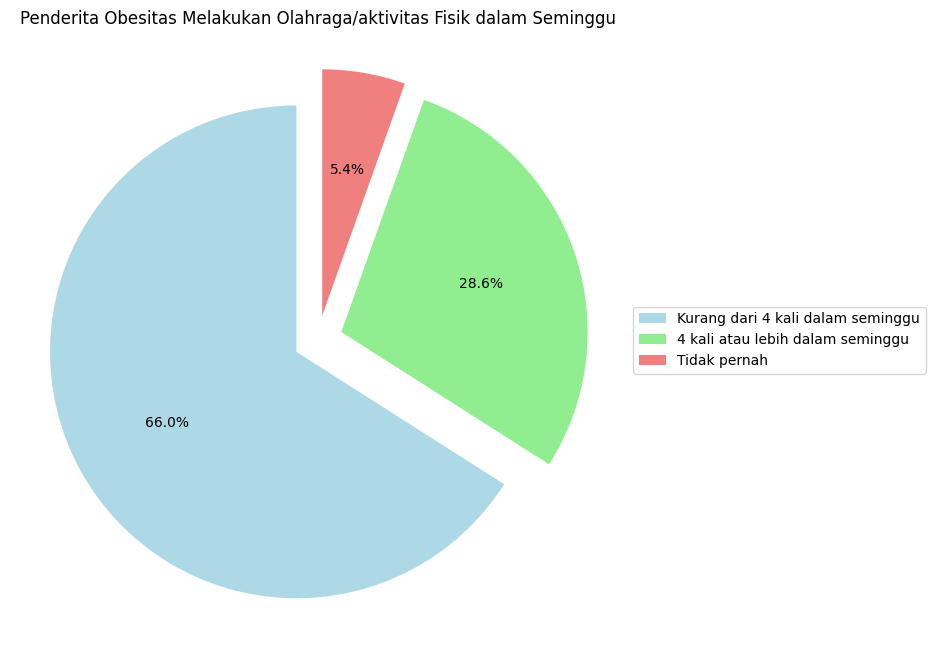

In [ ]:
colors = ['lightblue', 'lightgreen', 'lightcoral', 'purple', 'red']
explode = [0.1, 0.1, 0.1]  # Equal explode for all slices
labels = olah_obe.index
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(olah_obe, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax.legend(labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Penderita Obesitas Melakukan Olahraga/aktivitas Fisik dalam Seminggu')
plt.show()

Dari visualisasi di atas, dapat dilihat bahwa kebanyakan penderita obesitas mempunyai pola konsumsi yang kurang sehat, yaitu mengonsumsi junk food sebanyak 1-2 kali tetapi mengonsumsi sayuran dan buah kurang dari 400 gram dalam sehari. Ajuran pola konsumsi yang sehat adalah mengonsumsi junk food maksimal satu kali dalam seminggu dan 400 gr dalam sehari. Kebanyakan penderita obesitas juga melakukan aktivitas fisik/olahraga kurang dari 4 kali dalam seminggu.

### **Distribusi Umur setiap Penyakit**

Akan dilihat distribusi umur dari masing-masing penyakit untuk mengidentifikasi kelompok umur yang lebih rentan terhadap penyakit tertentu.

In [ ]:
df_umur = df[['USIA','Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?','Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?',
              'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?','Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?',
              'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?','Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?',
              'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?','Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?',
              'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?','Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?',
              'Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?','Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?',
              'Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?','Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?',
              'Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?','Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?',
              'Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?','Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?',
              'Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?','Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?'
              ]]

In [ ]:
# rename column
df_umur.rename(columns = {'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?':'Jantung',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?':'Stroke',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?':'Diabetes Melitus',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?':'Hipertensi',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?':'Kanker',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?':'Ginjal',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?':'Tumor',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?':'Osteoartritis',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?':'Lambung',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?':'Liver',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?':'TBC',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?':'DBD',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?':'COVID-19',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?':'HIV',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?':'Diare',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?':'Malaria',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?':'Sipilis',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?':'Thypus',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?':'Dermatitis',
                          'Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?':'Mikosis'}, inplace=True)

<ipython-input-88-e51f94e54e46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_umur.rename(columns = {'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?':'Jantung',


Karena jenis penyakit yang terdapat pada data ini cukup banyak, jadi akan dibagi menjadi dua, yaitu berdasarkan penyakit yang umumnya disebabkan oleh infeksi dan penyakit yang bersifat kronis.

#### **Penyakit Infeksi: Kelompok penyakit-penyakit yang umumnya disebabkan oleh infeksi atau agen penyebab mikroba**

Kelompok penyakit ini mencakup penyakit TBC, DBD, COVID-19, HIV, Diare, Malaria, Thypus, Sipilis, Dermatitis, Mikosis.

In [ ]:
df_infeksi = df_umur[['USIA','TBC','DBD','COVID-19','HIV','Diare','Malaria','Thypus','Sipilis','Dermatitis','Mikosis']]

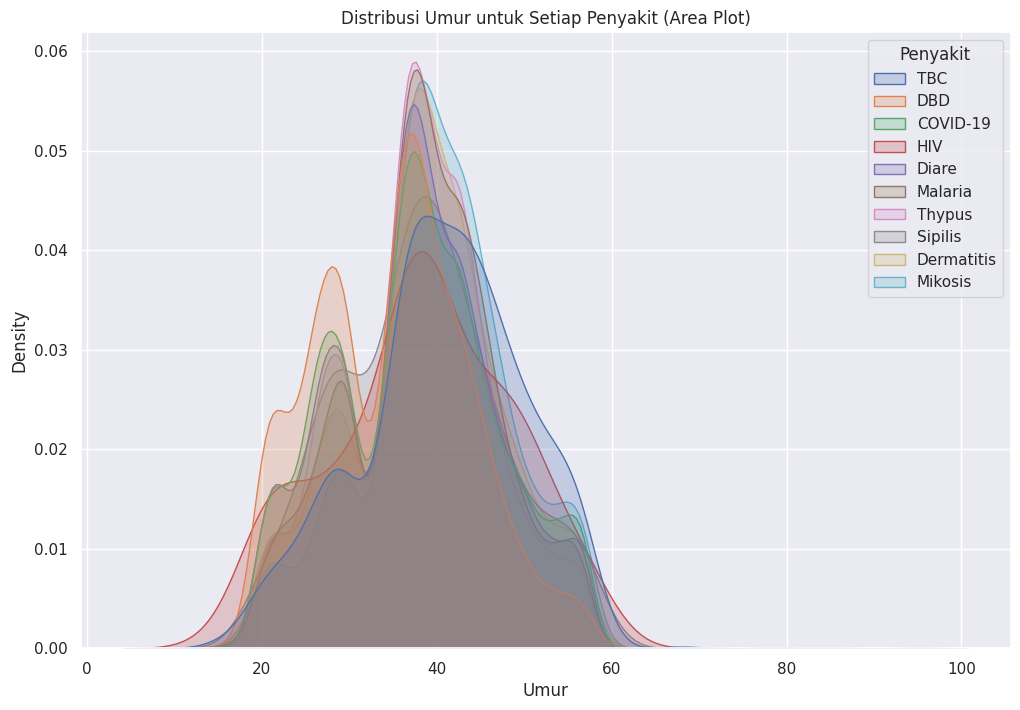

In [ ]:
infeksi_melt = pd.melt(df_infeksi, id_vars=['USIA'], var_name='Penyakit', value_name='Berpenyakit')

# Filter hanya yang berpenyakit
data_berpenyakit = infeksi_melt[infeksi_melt['Berpenyakit'] == 'Ya']

# Distribusi Umur dengan Area Plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data_berpenyakit, x='USIA', hue='Penyakit', fill=True, common_norm=False)
plt.title('Distribusi Umur untuk Setiap Penyakit (Area Plot)')
plt.xlabel('Umur')
plt.ylabel('Density')
plt.show()

Berdasarkan visualisasi data, terlihat bahwa penyakit yang umumnya disebabkan oleh infeksi memiliki puncak distribusi umur responden di sekitar rentang usia 35-55 tahun. Hal ini mengindikasikan bahwa pada kelompok usia tersebut penting untuk pemantauan kesehatan dan pencegahan penyakit yang termasuk dalam kelompok.

#### **Penyakit Kronis: Kelompok penyakit-penyakit yang umumnya bersifat kronis dan terkait dengan faktor-faktor seperti gaya hidup, genetika, atau faktor lingkungan**

Kelompok penyakit ini mencakup penyakit Jantung, Stroke, Diabetes Melitus, Hipertensi, Kanker, Ginjal, Tumor, Osteoartritis, Lambung, Liver.

In [ ]:
df_kronis = df_umur[['USIA','Jantung','Stroke','Diabetes Melitus','Hipertensi','Kanker','Ginjal','Tumor','Osteoartritis','Lambung','Liver']]

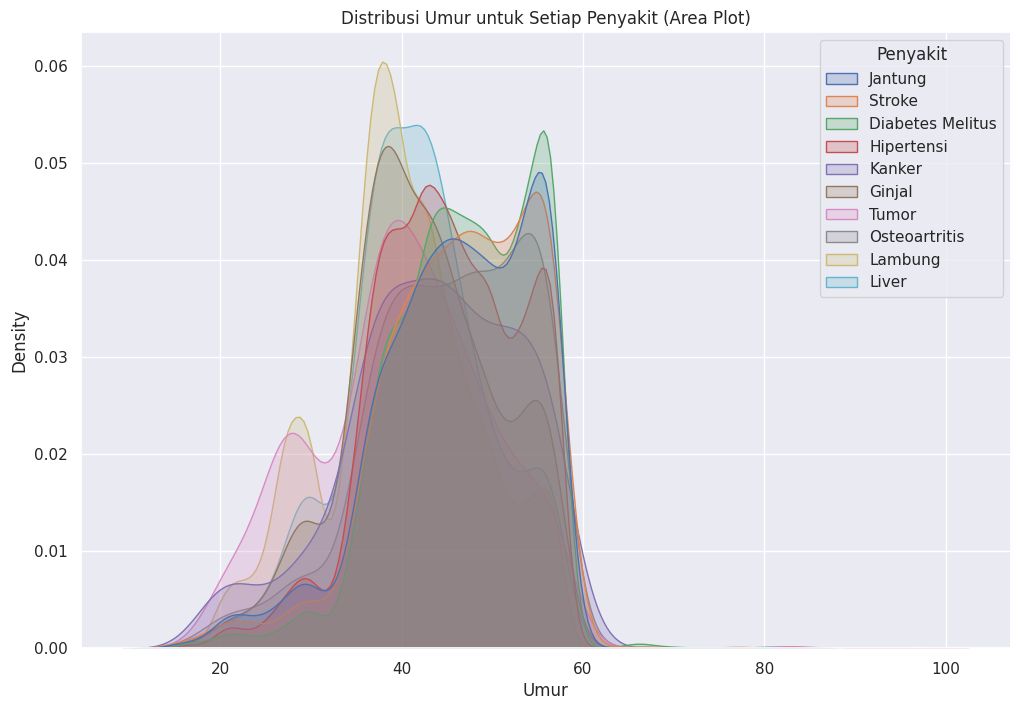

In [ ]:
kronis_melt = pd.melt(df_kronis, id_vars=['USIA'], var_name='Penyakit', value_name='Berpenyakit')

# Filter hanya yang berpenyakit
data_berpenyakit = kronis_melt[kronis_melt['Berpenyakit'] == 'Ya']

# Distribusi Umur dengan Area Plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data_berpenyakit, x='USIA', hue='Penyakit', fill=True, common_norm=False)
plt.title('Distribusi Umur untuk Setiap Penyakit (Area Plot)')
plt.xlabel('Umur')
plt.ylabel('Density')
plt.show()

Berbeda dengan kelompok penyakit sebelumnya, penyakit yang umumnya bersifat kronis memiliki puncak distribusi umur responden di sekitar rentang usia 35-45 dan 55 - 65 tahun. Hal ini mengindikasikan bahwa pada kelompok usia tersebut penting untuk pemantauan kesehatan dan pencegahan penyakit yang termasuk dalam kelompok.

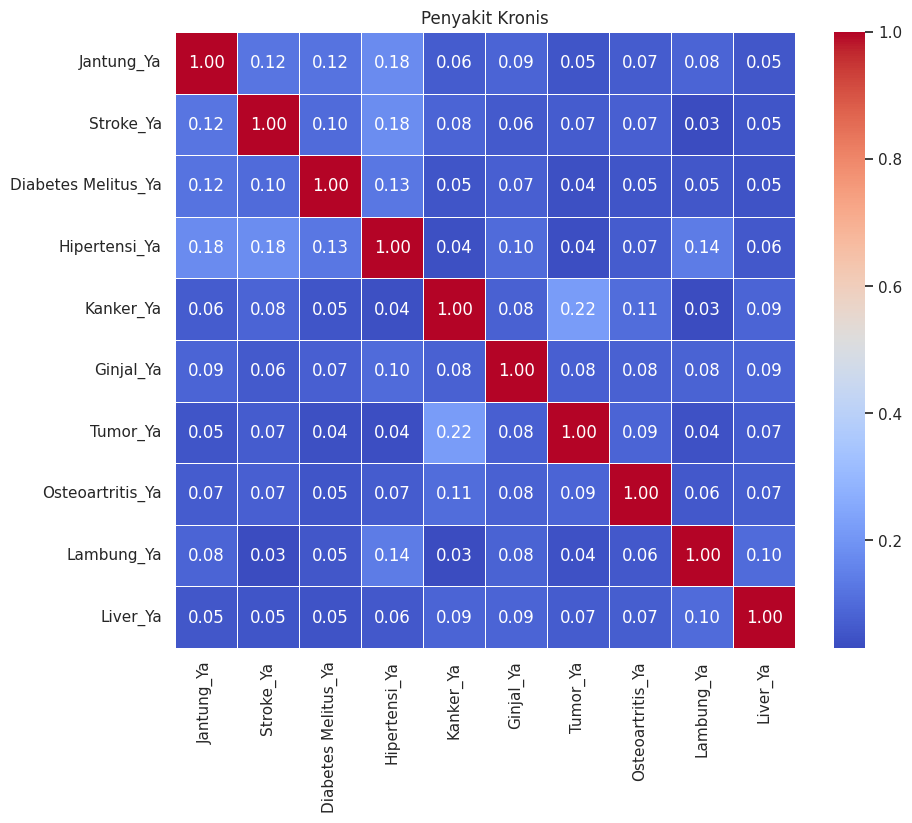

In [ ]:
# Membuat dummy variable dari variabel penyakit
df_kronis2 = pd.get_dummies(df_kronis[['Jantung', 'Stroke', 'Diabetes Melitus', 'Hipertensi', 'Kanker', 'Ginjal', 'Tumor', 'Osteoartritis', 'Lambung', 'Liver']], drop_first=True)

# Menghitung korelasi antar variabel penyakit
correlation_matrix_dummy = df_kronis2.corr()

# Visualisasi HeatMap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_dummy, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Penyakit Kronis')
plt.show()

Penyakit Tumor dan Kanker memiliki korelasi yang cukup kuat dibandingkan penyakit kronis lainnya, Jantung dan Hipertensi memiliki korelasi yang cukup kuat sama dengan Stroke dan Hipertensi

In [ ]:
counts = df_kronis.groupby(['Jantung','Stroke','Hipertensi']).size().unstack(fill_value=0)
counts

Hipertensi       Tidak     Ya
Jantung Stroke               
Tidak   Tidak   271834  12755
        Ya         500    649
Ya      Tidak     2441   1306
        Ya          74    242

* Terdapat 242 orang yang terdiagnosa 3 penyakit kronis sekaligus, yaitu Jantung, Stroke, dan Hipertensi. Orang-orang ini butuh perhatian penuh agar kondisinya tidak memburuk.
* Terdapat 1306 orang yang terdiagnosa penyakit Jantung dan Hipertensi. Orang-orang ini butuh perhatian khusus karena beresiko terkena Stroke.

In [ ]:
counts = df_kronis.groupby(['Tumor', 'Kanker']).size().unstack(fill_value=0)
counts

Kanker   Tidak   Ya
Tumor              
Tidak   288769  273
Ya         638  121

* Terdapat 121 orang yang terdiagnosa Tumor dan Kanker sekaligus
* Terdapat 638 orang yang terdiagnosa Tumor, tetapi tidak terdiagnosa Kanker. Orang-orang ini harus memeriksakan dirinya secara berkala jika belum mendapatkan tindakan sebelumnya karena terdapat resiko tumor berkembang menjadi sel kanker.

In [ ]:
df_gagalginjal = df_gagalginjal.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?': 'Diabetes?'})
df_gagalginjal = df_gagalginjal.rename(columns={'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?': 'Ginjal?'})
df_gagalginjal = df_gagalginjal.rename(columns={'Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?': 'Konsumsi air mineral'})

counts3 = df_gagalginjal.groupby(['Diabetes?', 'Ginjal?', 'Konsumsi air mineral']).size().unstack(fill_value=0)
counts3

Konsumsi air mineral  2 Liter  Kurang dari 2 Liter  Lebih dari 2 liter
Diabetes? Ginjal?                                                     
Tidak     Tidak         81223                26900              173670
          Ya              493                  410                 858
Ya        Tidak          1660                  730                3554
          Ya               79                   79                 145

* Terdapat 1660 orang yang konsumsi air mineral 2 liter per hari terdiagnosa Diabetes Melitus, tidak terdiagnosa penyakit Ginjal.
* Terdapat 3554 orang yang terdiagnosa Diabetes Melitus, tidak terdiagnosa penyakit Ginjal dan konsumsi air mineral lebih dari 2 liter per hari. Orang-orang ini perlu memeriksakan fungsi Ginjalnya, jika ada penurunan fungsi ginjal maka konsumsi air mineral perlu dibatasi.
* Terdapat 730 orang yang terdiagnosa Diabetes Melitus, tidak terdiagnosa penyakit Ginjal, dan mengkonsumsi kurang dari 2 liter air mineral per hari. Orang-orang ini perlu meningkatkan jumlah konsumsi air mineral agar tidak dehidrasi karena dehidrasi dapat berpengaruh terhadap kadar gula dalam darah.

### **Melihat Hubungan Variabel**

#### **Kesehatan Mental vs Obesitas**

Karena pada visualisasi sebelumnya terlihat bahwa sepertiga dari individu yang memiliki mental kurang baik adalah seseorang dengan IMT obesitas, maka akan dilihat apakah IMT obesitas berpengaruh terhadap kesehatan mental individu dengan menggunakan regresi logistik.

In [ ]:
df_mental2 = df_mental
df_mental2['IMT'].value_counts()

Normal          138961
Obesitas         82360
Gemuk            67319
Kurus              919
Sangat Kurus       242
Name: IMT, dtype: int64

In [ ]:
df_mental2['IMT'] = df_mental2['IMT'].replace({'Sangat Kurus':'Tidak','Kurus':'Tidak', 'Normal':'Tidak', 'Gemuk':'Tidak'})
df_mental2['IMT'].value_counts()

Tidak       207441
Obesitas     82360
Name: IMT, dtype: int64

In [ ]:
mental_obe = pd.get_dummies(df_mental2, columns=['IMT','Kesehatan Mental'])
mental_obe.head(10)

ID WILAYAH JENIS KELAMIN  NILAI IMT  USIA Kelompok Umur  \
0   1  KALBAR   LAKI - LAKI  29.796114  34.0       25 - 34   
1   2  KALBAR   LAKI - LAKI  24.364563  43.0       35 - 44   
2   3  KALBAR   LAKI - LAKI  20.883912  21.0       15 - 24   
3   4  KALBAR   LAKI - LAKI  28.753975  40.0       35 - 44   
4   5  KALBAR   LAKI - LAKI  22.911836  28.0       25 - 34   
5   6  KALBAR   LAKI - LAKI  23.000885  47.0       45 - 54   
6   7  KALBAR   LAKI - LAKI  25.006824  41.0       35 - 44   
7   8  KALBAR   LAKI - LAKI  22.710204  28.0       25 - 34   
8   9  KALBAR   LAKI - LAKI  24.868725  23.0       15 - 24   
9  10  KALBAR   LAKI - LAKI  29.937660  41.0       35 - 44   

  PENDIDIKAN TERAKHIR Status Perkawinan        PENGELUARAN/BULAN  \
0                 SMA           Menikah  Rp. 7 Juta s.d. 10 Juta   
1                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta   
2                 SMA     Belum Menikah   Rp. 2 Juta s.d. 6 Juta   
3                  S2           Menikah  Rp. 7 Juta s.d. 10 Juta   
4                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta   
5                 SMP           Menikah   Rp. 2 Juta s.d. 6 Juta   
6                  S1           Menikah   Rp. 2 Juta s.d. 6 Juta   
7                  S1           Menikah   Rp. 2 Juta s.d. 6 Juta   
8                 SMA     Belum Menikah   Rp. 2 Juta s.d. 6 Juta   
9                 SMA           Menikah   Rp. 2 Juta s.d. 6 Juta   

  Sering menderita sakit kepala ? Tidak nafsu makan ?    Sulit tidur ?  \
0                 Kadang - kadang               Tidak            Tidak   
1                           Tidak               Tidak            Tidak   
2                 Kadang - kadang               Tidak            Tidak   
3                           Tidak               Tidak            Tidak   
4                 Kadang - kadang               Tidak            Tidak   
5                 Kadang - kadang               Tidak  Kadang - kadang   
6                 Kadang - kadang               Tidak            Tidak   
7                           Tidak     Kadang - kadang  Kadang - kadang   
8                           Tidak               Tidak            Tidak   
9                 Kadang - kadang               Tidak            Tidak   

     Mudah takut ? Merasa tegang, cemas atau kuatir ? Tangan anda gemetar ?  \
0            Tidak                              Tidak                 Tidak   
1            Tidak                              Tidak                 Tidak   
2  Kadang - kadang                              Tidak                 Tidak   
3            Tidak                              Tidak                 Tidak   
4            Tidak                              Tidak                 Tidak   
5            Tidak                              Tidak                 Tidak   
6            Tidak                              Tidak                 Tidak   
7            Tidak                              Tidak                 Tidak   
8            Tidak                              Tidak                 Tidak   
9            Tidak                              Tidak                 Tidak   

  Pencernaan anda terganggu / buruk ? Sulit untuk berpikir jernih ?  \
0                               Tidak                         Tidak   
1                               Tidak                         Tidak   
2                               Tidak                         Tidak   
3                               Tidak                         Tidak   
4                               Tidak                         Tidak   
5                               Tidak                         Tidak   
6                               Tidak                         Tidak   
7                     Kadang - kadang                         Tidak   
8                               Tidak                         Tidak   
9                     Kadang - kadang                         Tidak   

  Merasa tidak bahagia ? Menangis lebih sering ?  \
0                  Tidak                   Tidak   


In [ ]:
import statsmodels.api as sm

# Variabel dependen dan Independen
X = mental_obe[['IMT_Obesitas']]
y = mental_obe['Kesehatan Mental_Perlu Perhatian Khusus']

# Tambahkan konstanta untuk model regresi logistik
X = sm.add_constant(X)

# Buat model regresi logistik
model = sm.Logit(y, X)

# Fitting model
result = model.fit()

# Tampilkan hasil
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully.
         Current function value: inf
         Iterations 10


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                                      Logit Regression Results                                     
Dep. Variable:     Kesehatan Mental_Perlu Perhatian Khusus   No. Observations:               289801
Model:                                               Logit   Df Residuals:                   289799
Method:                                                MLE   Df Model:                            1
Date:                                     Thu, 21 Dec 2023   Pseudo R-squ.:                     inf
Time:                                             16:41:39   Log-Likelihood:                   -inf
converged:                                            True   LL-Null:                        0.0000
Covariance Type:                                 nonrobust   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.2875      0.051   -

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Dari hasil analisis regresi logistik didapatkan nilai koefisien variabel IMT jika individu obesitas adalah 0.3512 yang signifikan karena p-value < 0.05. Sehingga dapat diartikan individu dengan IMT Obesitas akan mengalami gangguan kesehatan mental sebesar exp(0.3512) = 1.42 kali lipat daripada individu dengan IMT bukan obesitas. Oleh karena itu, dapat disimpulkan **keadaan IMT Obesitas ini dapat meningkatkan peluang seseorang untuk memiliki gangguan kesehatan mental**.

#### **Kesehatan Mental vs Status Pernikahan**

Karena pada visualisasi sebelumnya terlihat bahwa lebih dari 80% individu yang sudah menikah memiliki kesehatan mental kurang baik, maka akan dilihat apakah terdapat hubungan antara status pernikahan dengan gangguan kesehatan mental menggunakan regresi logistik.

In [ ]:
mental_nikah = pd.get_dummies(df_mental2, columns=['Status Perkawinan','Kesehatan Mental'])
mental_nikah.head(10)

ID WILAYAH JENIS KELAMIN  NILAI IMT       IMT  USIA Kelompok Umur  \
0   1  KALBAR   LAKI - LAKI  29.796114  Obesitas  34.0       25 - 34   
1   2  KALBAR   LAKI - LAKI  24.364563     Tidak  43.0       35 - 44   
2   3  KALBAR   LAKI - LAKI  20.883912     Tidak  21.0       15 - 24   
3   4  KALBAR   LAKI - LAKI  28.753975  Obesitas  40.0       35 - 44   
4   5  KALBAR   LAKI - LAKI  22.911836     Tidak  28.0       25 - 34   
5   6  KALBAR   LAKI - LAKI  23.000885     Tidak  47.0       45 - 54   
6   7  KALBAR   LAKI - LAKI  25.006824     Tidak  41.0       35 - 44   
7   8  KALBAR   LAKI - LAKI  22.710204     Tidak  28.0       25 - 34   
8   9  KALBAR   LAKI - LAKI  24.868725     Tidak  23.0       15 - 24   
9  10  KALBAR   LAKI - LAKI  29.937660  Obesitas  41.0       35 - 44   

  PENDIDIKAN TERAKHIR        PENGELUARAN/BULAN  \
0                 SMA  Rp. 7 Juta s.d. 10 Juta   
1                 SMA   Rp. 2 Juta s.d. 6 Juta   
2                 SMA   Rp. 2 Juta s.d. 6 Juta   
3                  S2  Rp. 7 Juta s.d. 10 Juta   
4                 SMA   Rp. 2 Juta s.d. 6 Juta   
5                 SMP   Rp. 2 Juta s.d. 6 Juta   
6                  S1   Rp. 2 Juta s.d. 6 Juta   
7                  S1   Rp. 2 Juta s.d. 6 Juta   
8                 SMA   Rp. 2 Juta s.d. 6 Juta   
9                 SMA   Rp. 2 Juta s.d. 6 Juta   

  Sering menderita sakit kepala ? Tidak nafsu makan ?    Sulit tidur ?  \
0                 Kadang - kadang               Tidak            Tidak   
1                           Tidak               Tidak            Tidak   
2                 Kadang - kadang               Tidak            Tidak   
3                           Tidak               Tidak            Tidak   
4                 Kadang - kadang               Tidak            Tidak   
5                 Kadang - kadang               Tidak  Kadang - kadang   
6                 Kadang - kadang               Tidak            Tidak   
7                           Tidak     Kadang - kadang  Kadang - kadang   
8                           Tidak               Tidak            Tidak   
9                 Kadang - kadang               Tidak            Tidak   

     Mudah takut ? Merasa tegang, cemas atau kuatir ? Tangan anda gemetar ?  \
0            Tidak                              Tidak                 Tidak   
1            Tidak                              Tidak                 Tidak   
2  Kadang - kadang                              Tidak                 Tidak   
3            Tidak                              Tidak                 Tidak   
4            Tidak                              Tidak                 Tidak   
5            Tidak                              Tidak                 Tidak   
6            Tidak                              Tidak                 Tidak   
7            Tidak                              Tidak                 Tidak   
8            Tidak                              Tidak                 Tidak   
9            Tidak                              Tidak                 Tidak   

  Pencernaan anda terganggu / buruk ? Sulit untuk berpikir jernih ?  \
0                               Tidak                         Tidak   
1                               Tidak                         Tidak   
2                               Tidak                         Tidak   
3                               Tidak                         Tidak   
4                               Tidak                         Tidak   
5                               Tidak                         Tidak   
6                               Tidak                         Tidak   
7                     Kadang - kadang                         Tidak   
8                               Tidak                         Tidak   
9                     Kadang - kadang                         Tidak   

  Merasa tidak bahagia ? Menangis lebih sering ?  \
0                  Tidak                   Tidak   
1                  Tidak                   Tidak   
2                  Tidak            

In [ ]:
import statsmodels.api as sm

# Pisahkan variabel independen (X) dan variabel dependen (y)
X = mental_nikah[['Status Perkawinan_Menikah', 'Status Perkawinan_Janda', 'Status Perkawinan_Duda']]  # Gantilah dengan kolom yang sesuai dengan data Anda
y = mental_nikah['Kesehatan Mental_Perlu Perhatian Khusus']

# Tambahkan konstanta untuk model regresi logistik
X = sm.add_constant(X)

# Buat model regresi logistik
model = sm.Logit(y, X)

# Fitting model
result = model.fit()

# Tampilkan hasil
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully.
         Current function value: inf
         Iterations 11


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                                      Logit Regression Results                                     
Dep. Variable:     Kesehatan Mental_Perlu Perhatian Khusus   No. Observations:               289801
Model:                                               Logit   Df Residuals:                   289797
Method:                                                MLE   Df Model:                            3
Date:                                     Thu, 21 Dec 2023   Pseudo R-squ.:                     inf
Time:                                             16:41:51   Log-Likelihood:                   -inf
converged:                                            True   LL-Null:                        0.0000
Covariance Type:                                 nonrobust   LLR p-value:                     1.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Dari hasil analisis regresi logistik didapatkan nilai koefisien variabel-variabel yang telah menikah semuanya positif. Sehingga, **jika individu sudah/pernah menikah, maka peluang individu tersebut mengalami gangguan kesehatan mental lebih tinggi daripada individu yang belum menikah**.
contoh interpretasi koefisien: exp(0.439) = 1.55, individu yang sudah menikah memiliki peluang mengalami gangguan mental 1.55 kali lipat daripada yang belum menikah.